# STEPS INVOLVED:
- CLUSTERING
- TIME SERIES ANALYSIS

In [3]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')                                         # Download the NLTK stopwords corpus 
stopwords = set(stopwords.words('english'))                        # Load the stopwords list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read the data

In [4]:
df = pd.read_csv("Cleaned_AllBeauty.csv")
df.head(2)

asin      reviewerID     reviewerName  overall           reviewText  \
0  7414204790   A5TA1NJOC0PJ5  Amazon Customer        5  excellent very good   
1  7414204790  A1TJICB7VLGQKL               LH        5        great product   

   reviewTime  verified     summary              brand  \
0  2016-03-10      True  Five Stars  Pirmal Healthcare   
1  2015-09-01      True  Five Stars  Pirmal Healthcare   

                                               title  price   rank  \
0  lacto calamine skin balance oil control ml pac...  12.15  67701   
1  lacto calamine skin balance oil control ml pac...  12.15  67701   

   review_length  polarity sentiment  
0             19     0.955  Positive  
1             13     0.800  Positive

### Converting the datatype of reviewTime to Date type

In [5]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

### checking null values

In [6]:
df.isnull().sum()              

asin               0
reviewerID         0
reviewerName      13
overall            0
reviewText       133
reviewTime         0
verified           0
summary            5
brand             15
title             16
price              0
rank               0
review_length      0
polarity           0
sentiment          0
dtype: int64

### Drop null values and again check null values 

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

asin             0
reviewerID       0
reviewerName     0
overall          0
reviewText       0
reviewTime       0
verified         0
summary          0
brand            0
title            0
price            0
rank             0
review_length    0
polarity         0
sentiment        0
dtype: int64

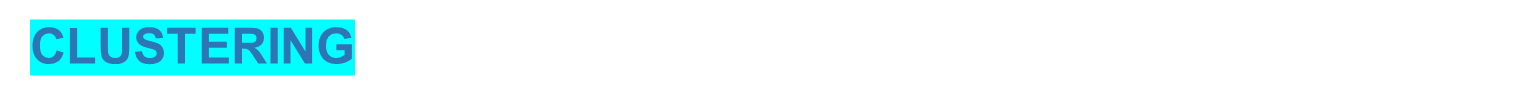
**Customer Segmentation : Distributing Customers into different segmemts / clusters**

### Make a copy of original data

In [9]:
df_bck = df.copy()
df_bck.head(2)

asin      reviewerID     reviewerName  overall           reviewText  \
0  7414204790   A5TA1NJOC0PJ5  Amazon Customer        5  excellent very good   
1  7414204790  A1TJICB7VLGQKL               LH        5        great product   

  reviewTime  verified     summary              brand  \
0 2016-03-10      True  Five Stars  Pirmal Healthcare   
1 2015-09-01      True  Five Stars  Pirmal Healthcare   

                                               title  price   rank  \
0  lacto calamine skin balance oil control ml pac...  12.15  67701   
1  lacto calamine skin balance oil control ml pac...  12.15  67701   

   review_length  polarity sentiment  
0             19     0.955  Positive  
1             13     0.800  Positive

### Select the columns to be used for clustering

In [11]:
X = df_bck[['polarity', 'price']]

**Kmeans Clustering**

### Finding the optimal number of clusters using the elbow method

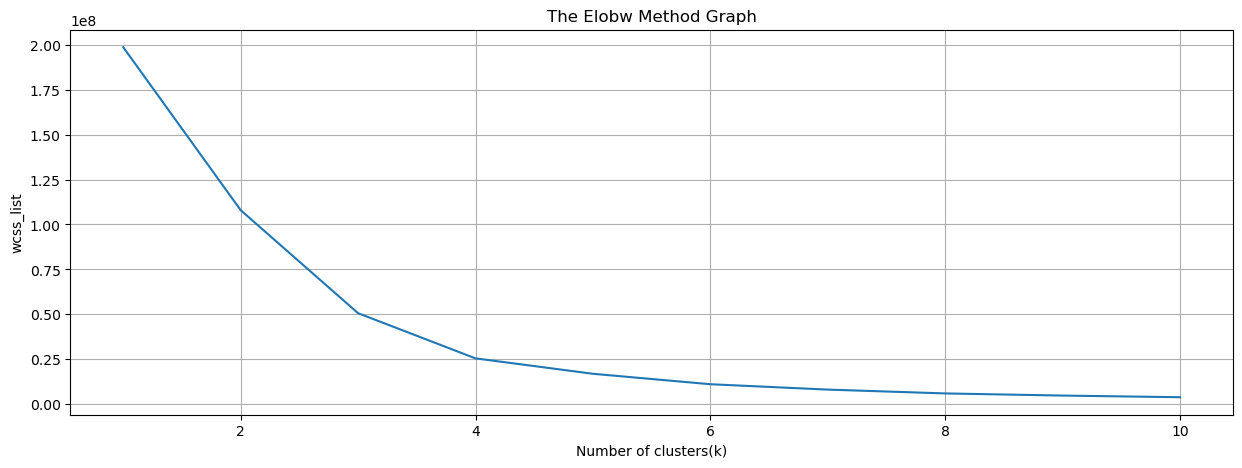

In [12]:
wcss_list= [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_) 

plt.figure(figsize = (15, 5)) 
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.grid(True);

### Training the K-means algorithm on the training dataset

In [13]:
X1 = X.values

In [14]:
model1 = KMeans(n_clusters = 3, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

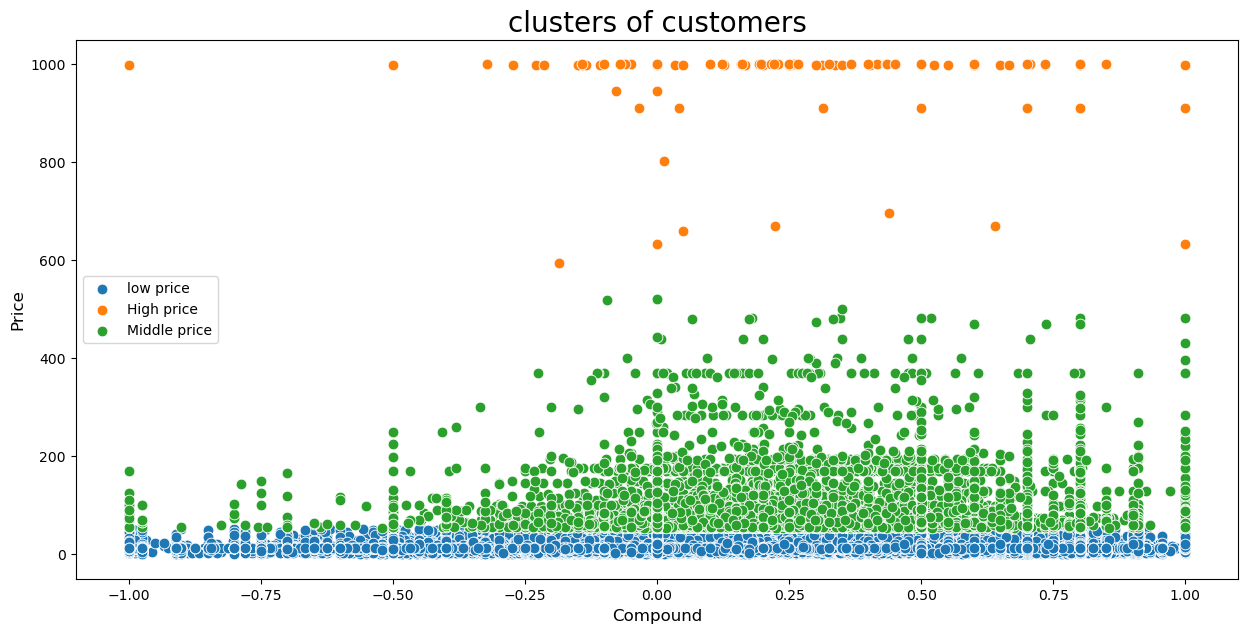

In [15]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=60,label="low price")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=60,label="High price")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=60,label="Middle price")

plt.title("clusters of customers",fontsize=20)
plt.xlabel("Compound",fontsize=12)
plt.ylabel("Price",fontsize=12);

- As the price increases, the number of data points with positive polarity increases
- Whereas for lower prices, the data points are spread across all polarities.
- This could suggest that customers are more likely to have positive sentiment towards products that are higher-priced, or that higher-priced products are associated with more positive experiences.

In [16]:
# Adding the cluster labels to the original DataFrame
df_bck['cluster_label'] = pred


In [18]:
# Profile Analysis: Grouping customers by cluster and computing summary statistics
cluster_profiles = df_bck.groupby('cluster_label').agg({
    'polarity': 'mean',  # Mean sentiment score
    'price': 'mean',     # Mean price
})

In [19]:
# Assigning meaningful labels to clusters
cluster_labels_map = {
    0: 'Low Price Segment',
    1: 'High Price Segment',
    2: 'Middle Price Segment',
}

In [20]:
# Mapping the cluster labels to meaningful names
df_bck['cluster_name'] = df_bck['cluster_label'].map(cluster_labels_map)

In [21]:
df_bck

asin      reviewerID       reviewerName  overall  \
0       7414204790   A5TA1NJOC0PJ5    Amazon Customer        5   
1       7414204790  A1TJICB7VLGQKL                 LH        5   
2       7414204790   A80M2286B7STE              dolly        5   
3       7414204790  A2TM2MAA8IT34U          Jack Warn        5   
4       7414204790   AQGWT465GTEJG  Chitralekha Tulal        4   
...            ...             ...                ...      ...   
381876  B01HJ84SGM  A2FZ7C9H14T5HZ            Kathy U        5   
381877  B01HJ84SGM  A1YQHF10YIMWOL     Sheila Willson        5   
381878  B01HJ84SGM  A1IYJVHJSCR8DR          Marcus Y.        5   
381879  B01HJ84SGM   A7WHO9ZFPHU2B  David P. Birtwell        5   
381880  B01HJASD20  A15UPE8UMHA5KR             PS1234        1   

                                               reviewText reviewTime  \
0                                     excellent very good 2016-03-10   
1                                           great product 2015-09-01   
2                                                 magical 2014-10-03   
3                                               excellent 2014-08-07   
4       i do like the product a lot i had bought them ... 2014-06-14   
...                                                   ...        ...   
381876  i have used this for a couple of years it work... 2017-10-03   
381877  i ve battled uti s for most of my life after r... 2017-08-24   
381878  i have been using this for years and i believe... 2017-05-29   
381879  i think d-mannose nature s herbs cranberry who... 2017-05-09   
381880  these legitimately look used like they repacka... 2016-08-31   

        verified                                   summary              brand  \
0           True                                Five Stars  Pirmal Healthcare   
1           True                                Five Stars  Pirmal Healthcare   
2           True                                Five Stars  Pirmal Healthcare   
3           True                                Five Stars  Pirmal Healthcare   
4           True                               Very pricey  Pirmal Healthcare   
...          ...                                       ...                ...   
381876      True                              Works great!            Unknown   
381877      True                            FREE OF UTI's!            Unknown   
381878      True           Great product. Very beneficial.            Unknown   
381879      True                             Lifesavers...            Unknown   
381880      True  Look used, save your money and don't buy            GBSTORE   

                                                    title  price    rank  \
0       lacto calamine skin balance oil control ml pac...  12.15   67701   
1       lacto calamine skin balance oil control ml pac...  12.15   67701   
2       lacto calamine skin balance oil control ml pac...  12.15   67701   
3       lacto calamine skin balance oil control ml pac...  12.15   67701   
4       lacto calamine skin balance oil control ml pac...  12.15   67701   
...                                                   ...    ...     ...   
381876              now d-mannose mg veg capsules pack of  55.63  207410   
381877              now d-mannose mg veg capsules pack of  55.63  207410   
381878              now d-mannose mg veg capsules pack of  55.63  207410   
381879              now d-mannose mg veg capsules pack of  55.63  207410   
381880  white feather shuttlecocks birdies badminton t...  12.99  965673   

        review_length  polarity sentiment  cluster_label          cluster_name  
0                  19  0.955000  Positive              0     Low Price Segment  
1                  13  0.800000  Positive              0     Low Price Segment  
2                   7  0.500000  Positive              0     Low Price Segment  
3                   9  1.000000  Positive              0     Low Price Segment  
4                 196  0.300000  Positive              0     Low 

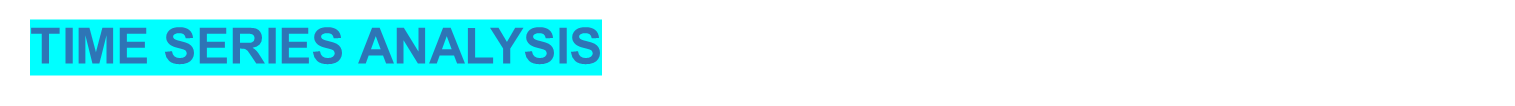

In [ ]:
nltk.download('vader_lexicon')

### Getting the polarity of reviewText

In [ ]:
res2 = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

In [ ]:
j = pd.DataFrame(res2).T
j

In [ ]:
df = pd.concat([df, j], axis = 1)

### For brand : Waterpik

In [ ]:
wa = df[df['brand'] == 'Waterpik'][['neg', 'pos', 'neu', 'reviewTime']]

In [70]:
wa['reviewTime'] = pd.to_datetime(wa['reviewTime'])

### Set date as index

In [71]:
wa = wa.set_index('reviewTime')
wa.sort_index(inplace=True)
wa.head()

neg    pos    neu
reviewTime                     
2006-11-13  0.000  0.244  0.756
2006-11-10  0.000  0.208  0.792
2006-11-09  0.000  1.000  0.000
2006-11-09  0.051  0.275  0.674
2006-11-05  0.181  0.288  0.532

### For brand : Philips Norelco

In [72]:
ph = df[df['brand'] == 'Philips Norelco'][['neg', 'pos', 'neu', 'reviewTime']]

In [73]:
ph['reviewTime'] = pd.to_datetime(ph['reviewTime'])

### Set date as index

In [74]:
ph = ph.set_index('reviewTime')
ph.sort_index(inplace=True)
ph.head()

neg    pos    neu
reviewTime                     
2005-10-11  0.321  0.000  0.679
2005-10-03  0.361  0.000  0.639
2005-07-07  0.000  0.401  0.599
2003-05-01  0.000  0.506  0.494
2015-05-11  0.082  0.263  0.655

### Set date as index

In [75]:
df1 = df1.set_index('reviewTime')
df1.sort_index(inplace=True)
df1.head()

overall  verified      reviewerID        asin       reviewerName  \
reviewTime                                                                      
02 19, 2015      1.0      True  A1V6B6TNIC10QE  0143026860  theodore j bigham   
12 18, 2014      4.0      True  A2F5GHSXFQ0W6J  0143026860       Mary K. Byke   
08 10, 2014      4.0      True  A1572GUYS7DGSR  0143026860            David G   
03 11, 2013      5.0      True   A1PSGLFK1NSVO  0143026860               TamB   
12 25, 2011      5.0      True   A6IKXKZMTKGSC  0143026860         shoecanary   

                                                    reviewText  \
reviewTime                                                       
02 19, 2015                                              great   
12 18, 2014  My  husband wanted to reading about the Negro ...   
08 10, 2014  This book was very informative, covering all a...   
03 11, 2013  I am already a baseball fan and knew a bit abo...   
12 25, 2011  This was a good story of the Black leagues. I ...   

                                                       summary  \
reviewTime                                                       
02 19, 2015                                           One Star   
12 18, 2014  ... to reading about the Negro Baseball and th...   
08 10, 2014                                     Worth the Read   
03 11, 2013                                          Good Read   
12 25, 2011                More than facts, a good story read!   

             unixReviewTime vote style image  
reviewTime                                    
02 19, 2015      1424304000  NaN   NaN   NaN  
12 18, 2014      1418860800  NaN   NaN   NaN  
08 10, 2014      1407628800  NaN   NaN   NaN  
03 11, 2013      1362960000  NaN   NaN   NaN  
12 25, 2011      1324771200    5   NaN   NaN

### Resampling the data based on month wise

In [76]:
wa = wa.resample('M').sum()
wa.shape

(148, 3)

In [77]:
ph = ph.resample('M').sum()
ph.shape

(189, 3)

## For brand : Waterpik

### Seasonal Decompose  For Waterpik on Positive Reviews

In [78]:
decomposition=seasonal_decompose(wa['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

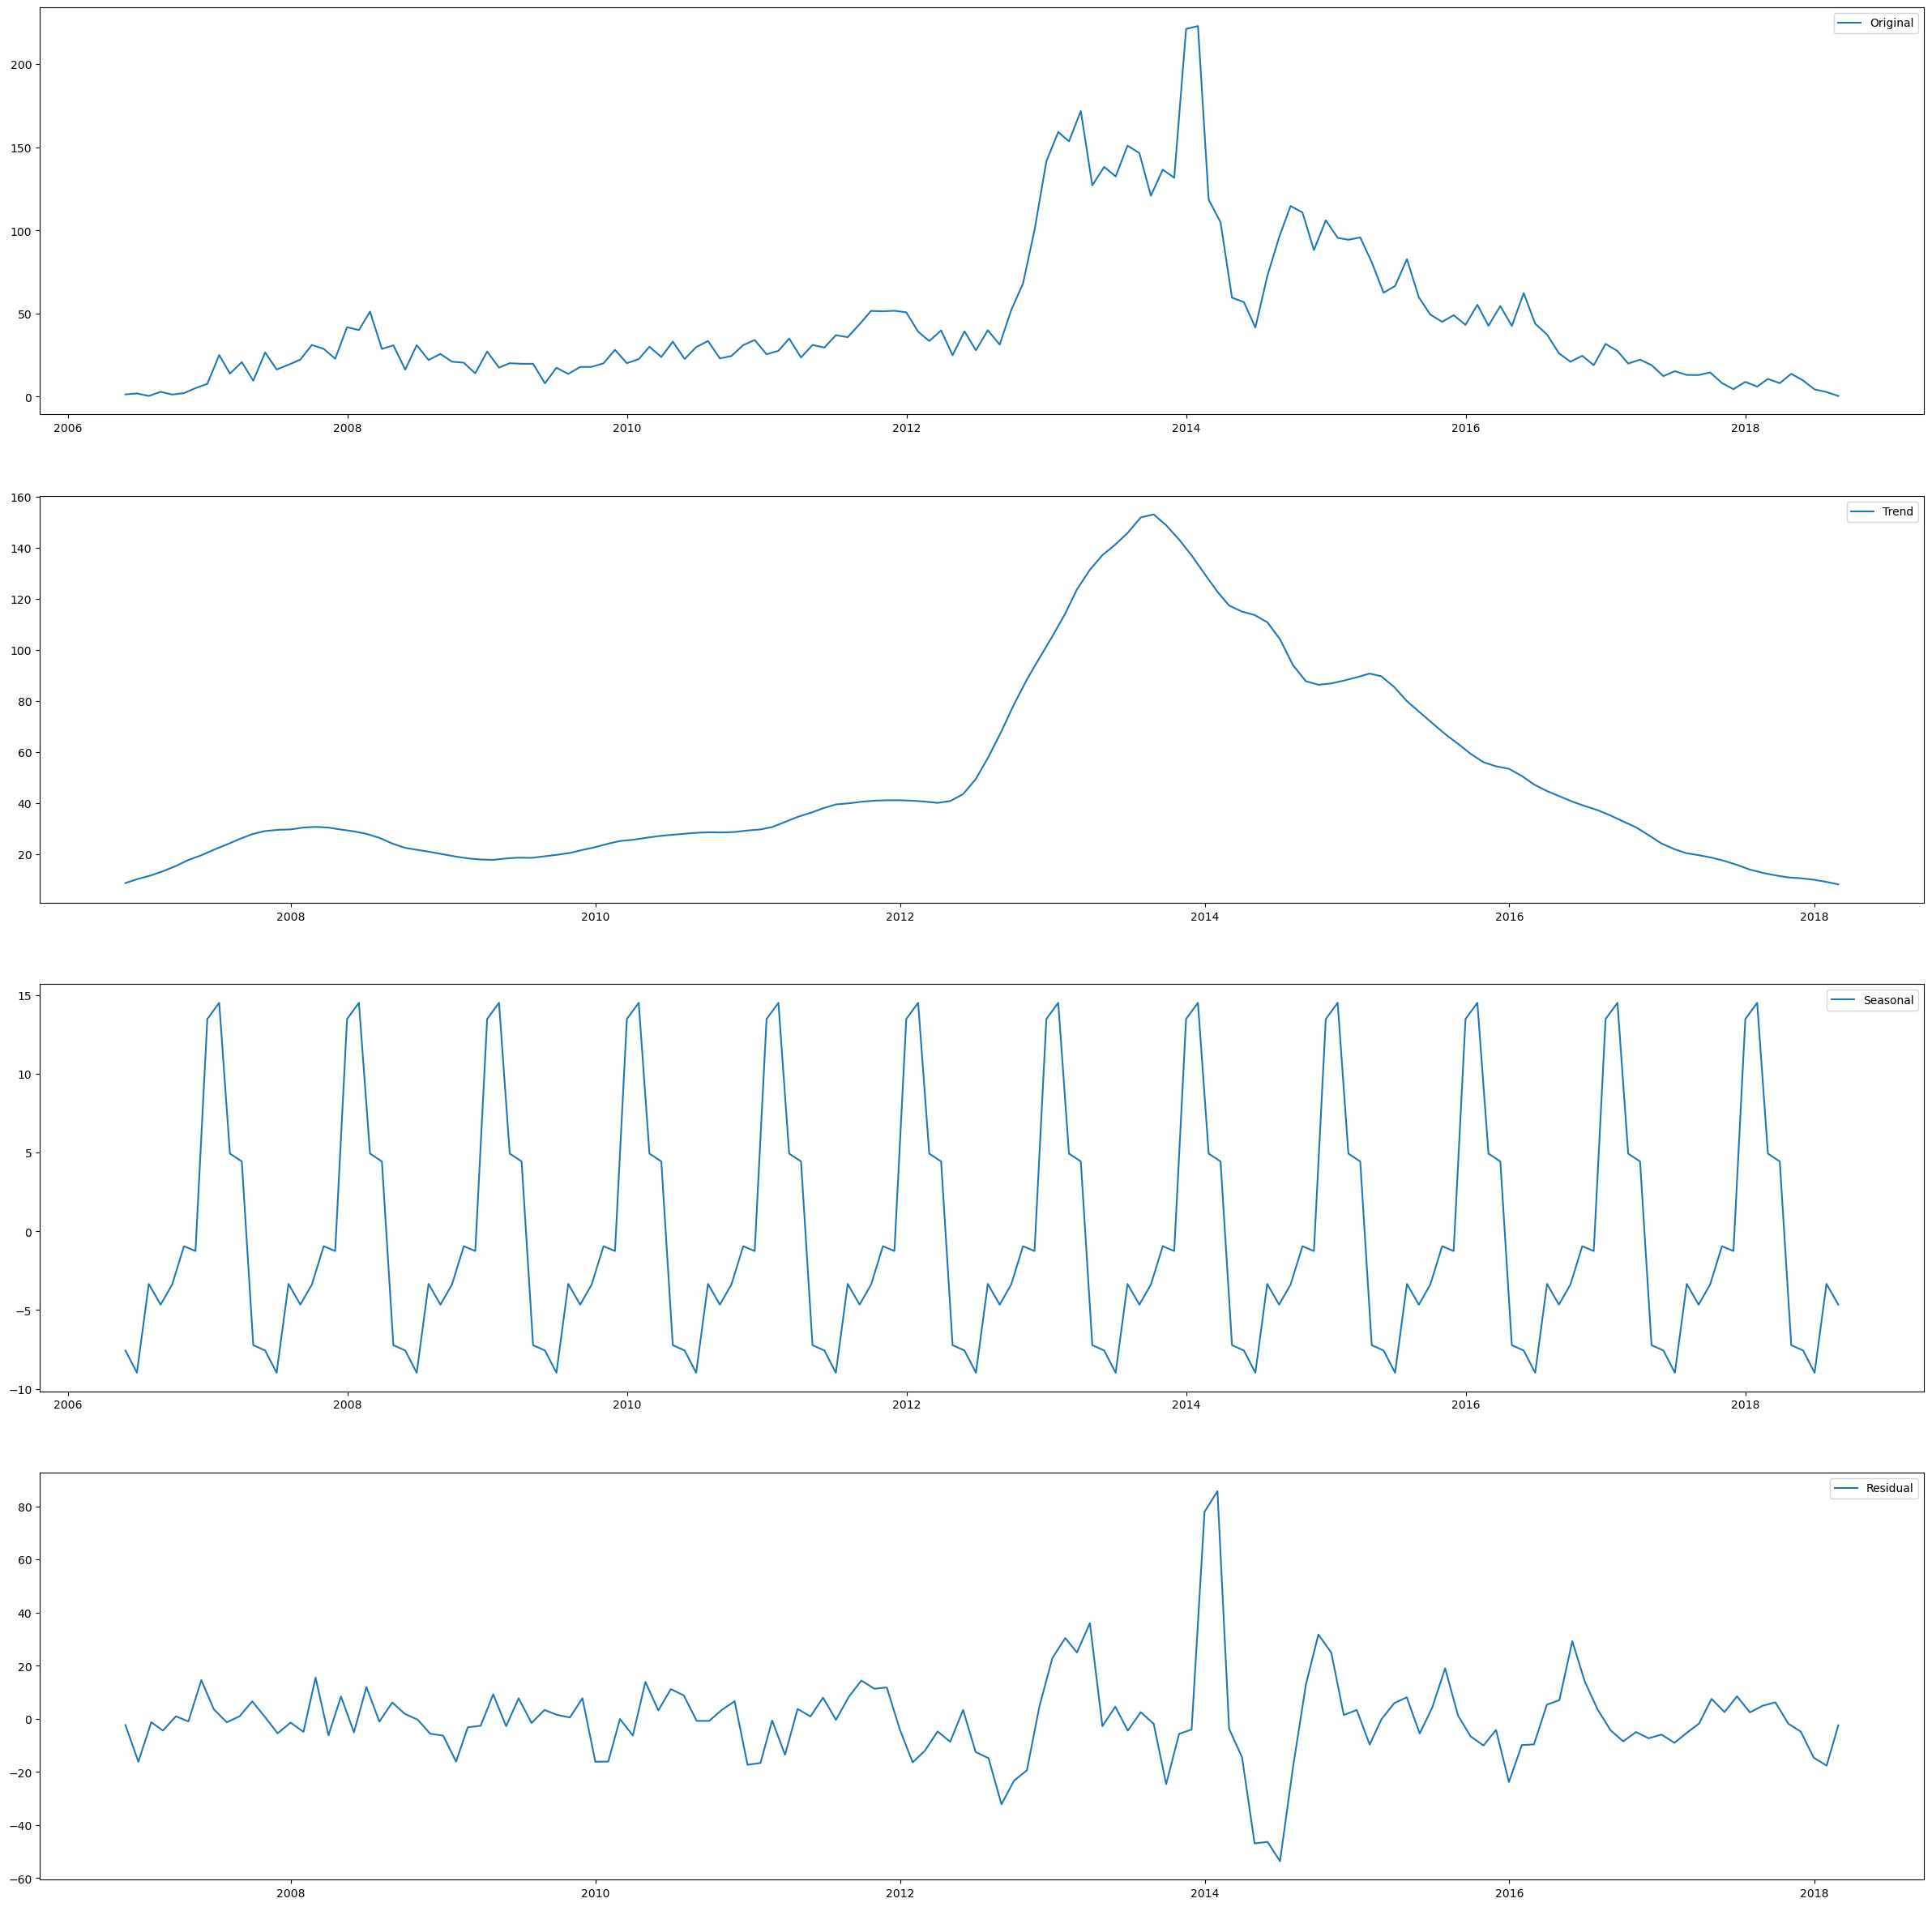

In [79]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Waterpik on Neutral Reviews

In [80]:
decomposition=seasonal_decompose(wa['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

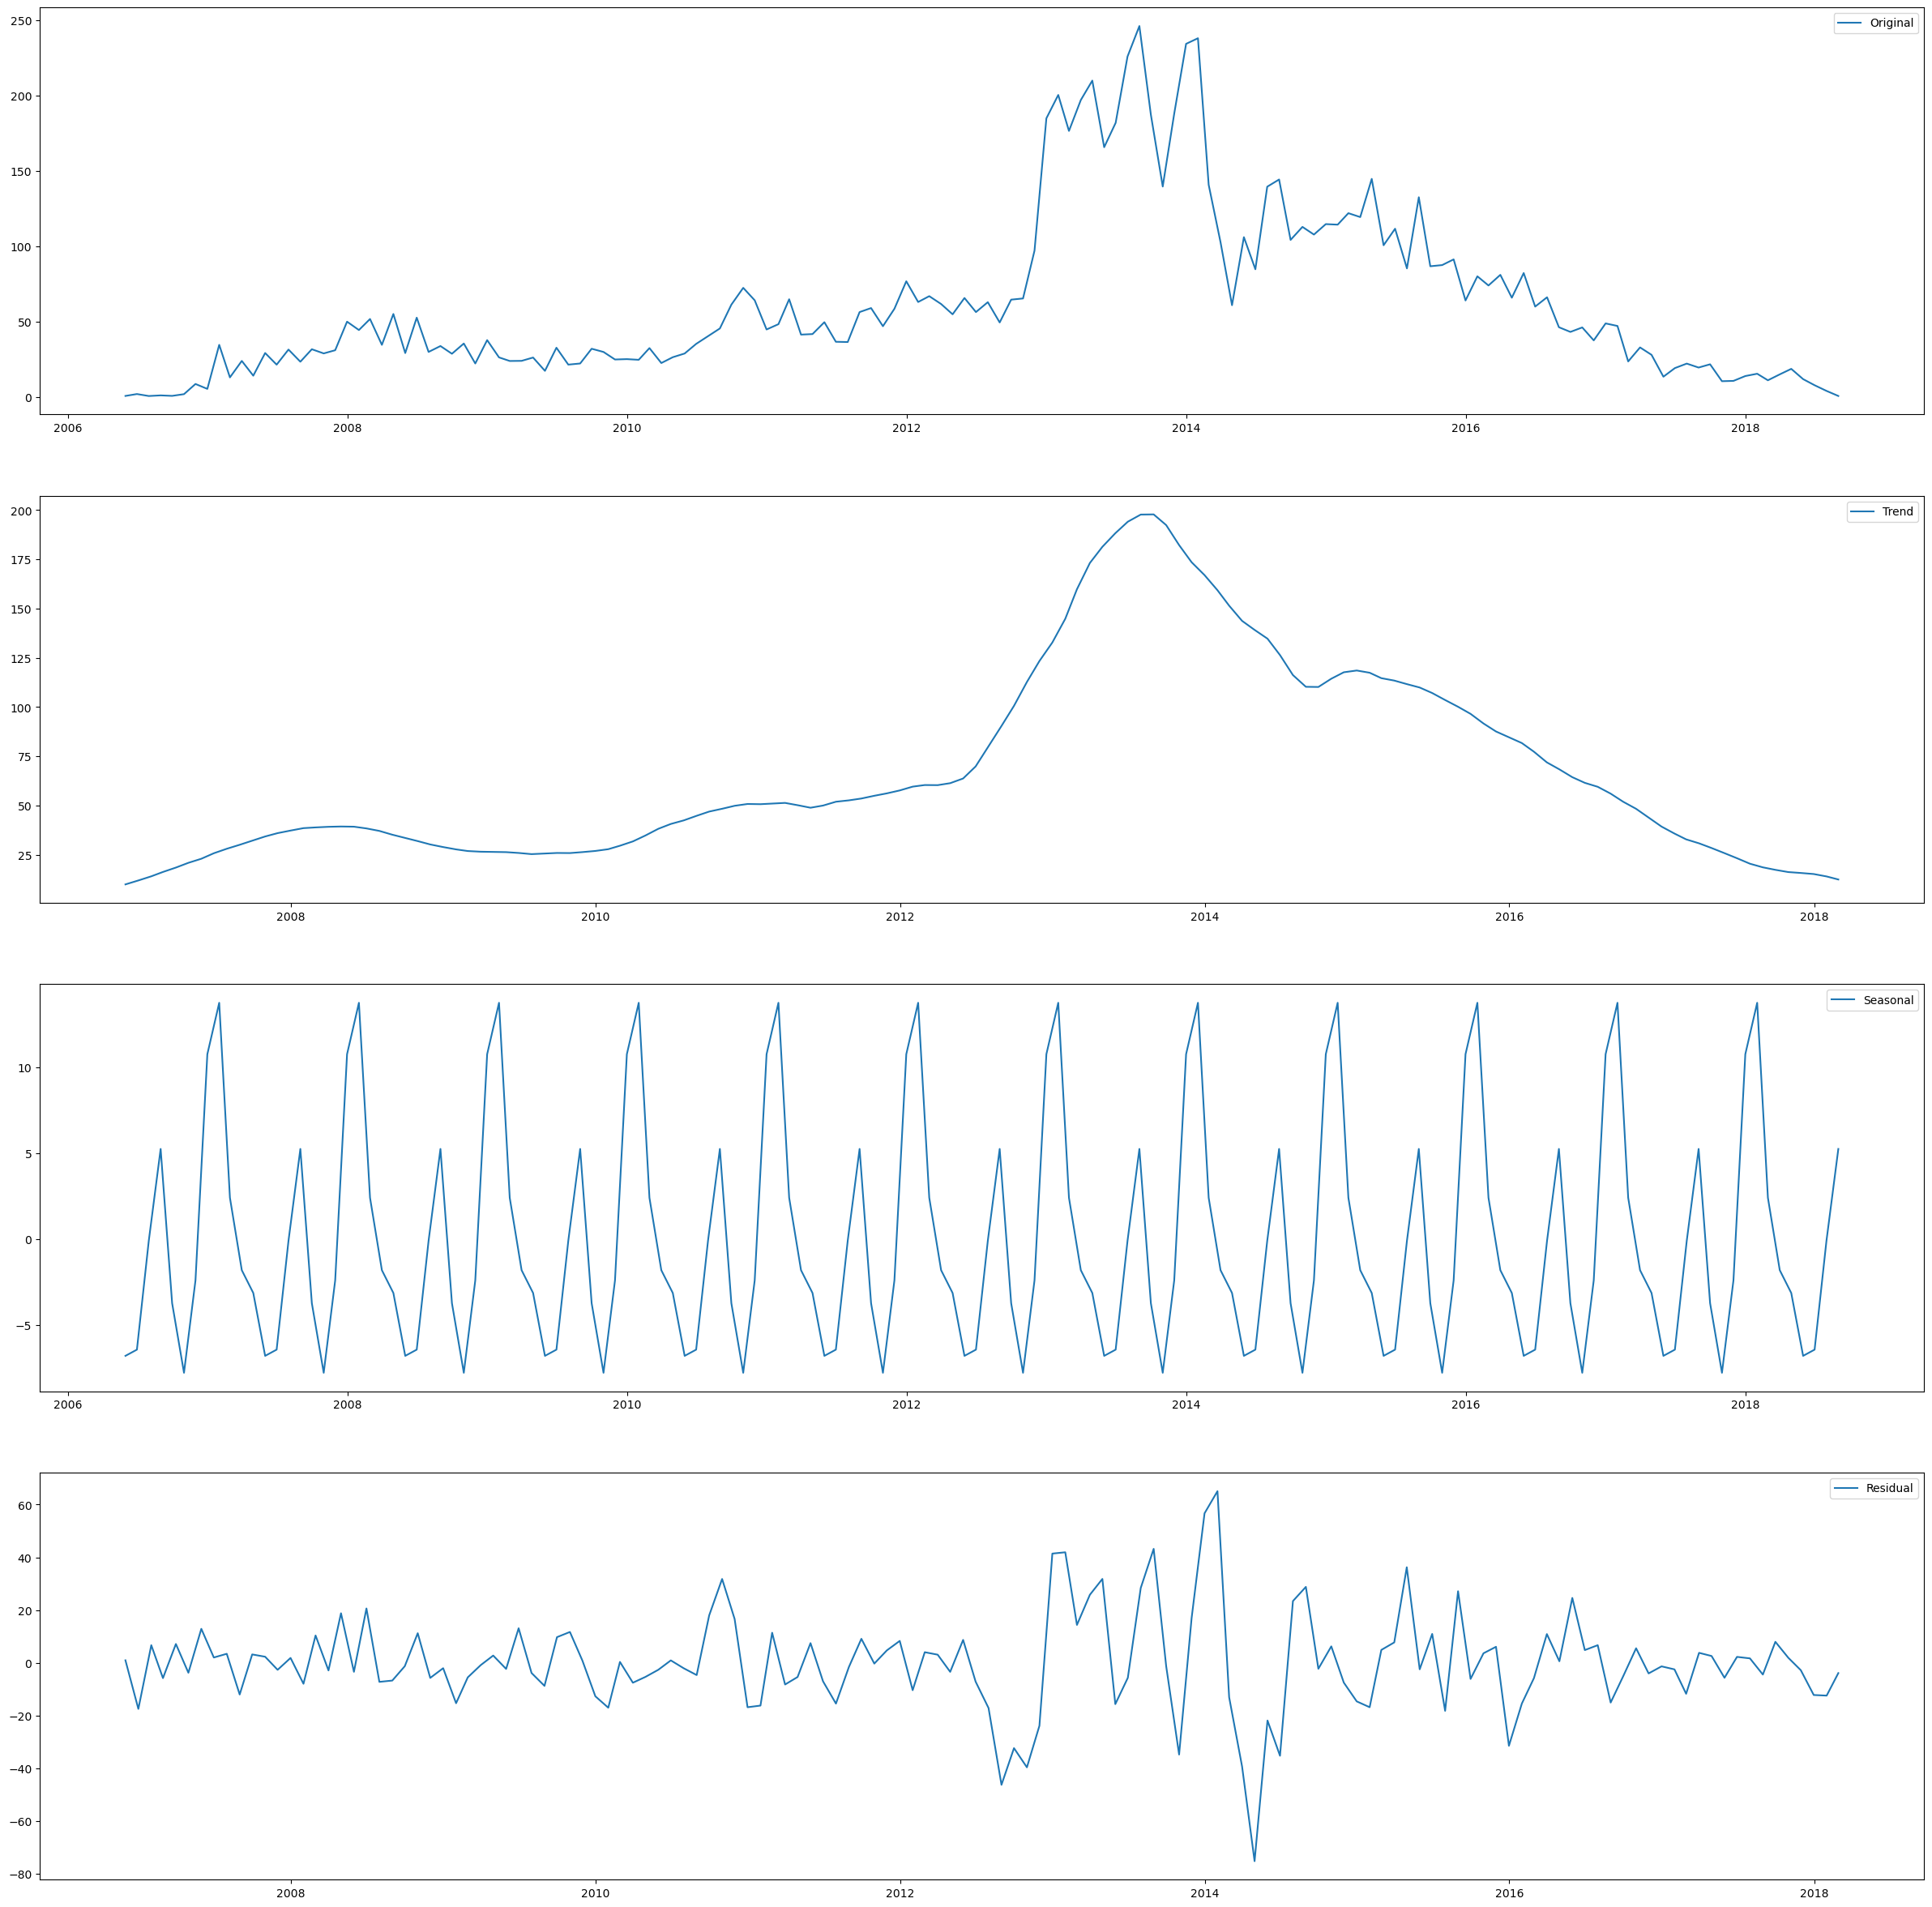

In [81]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Waterpik on Negative Reviews

In [82]:
decomposition=seasonal_decompose(wa['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

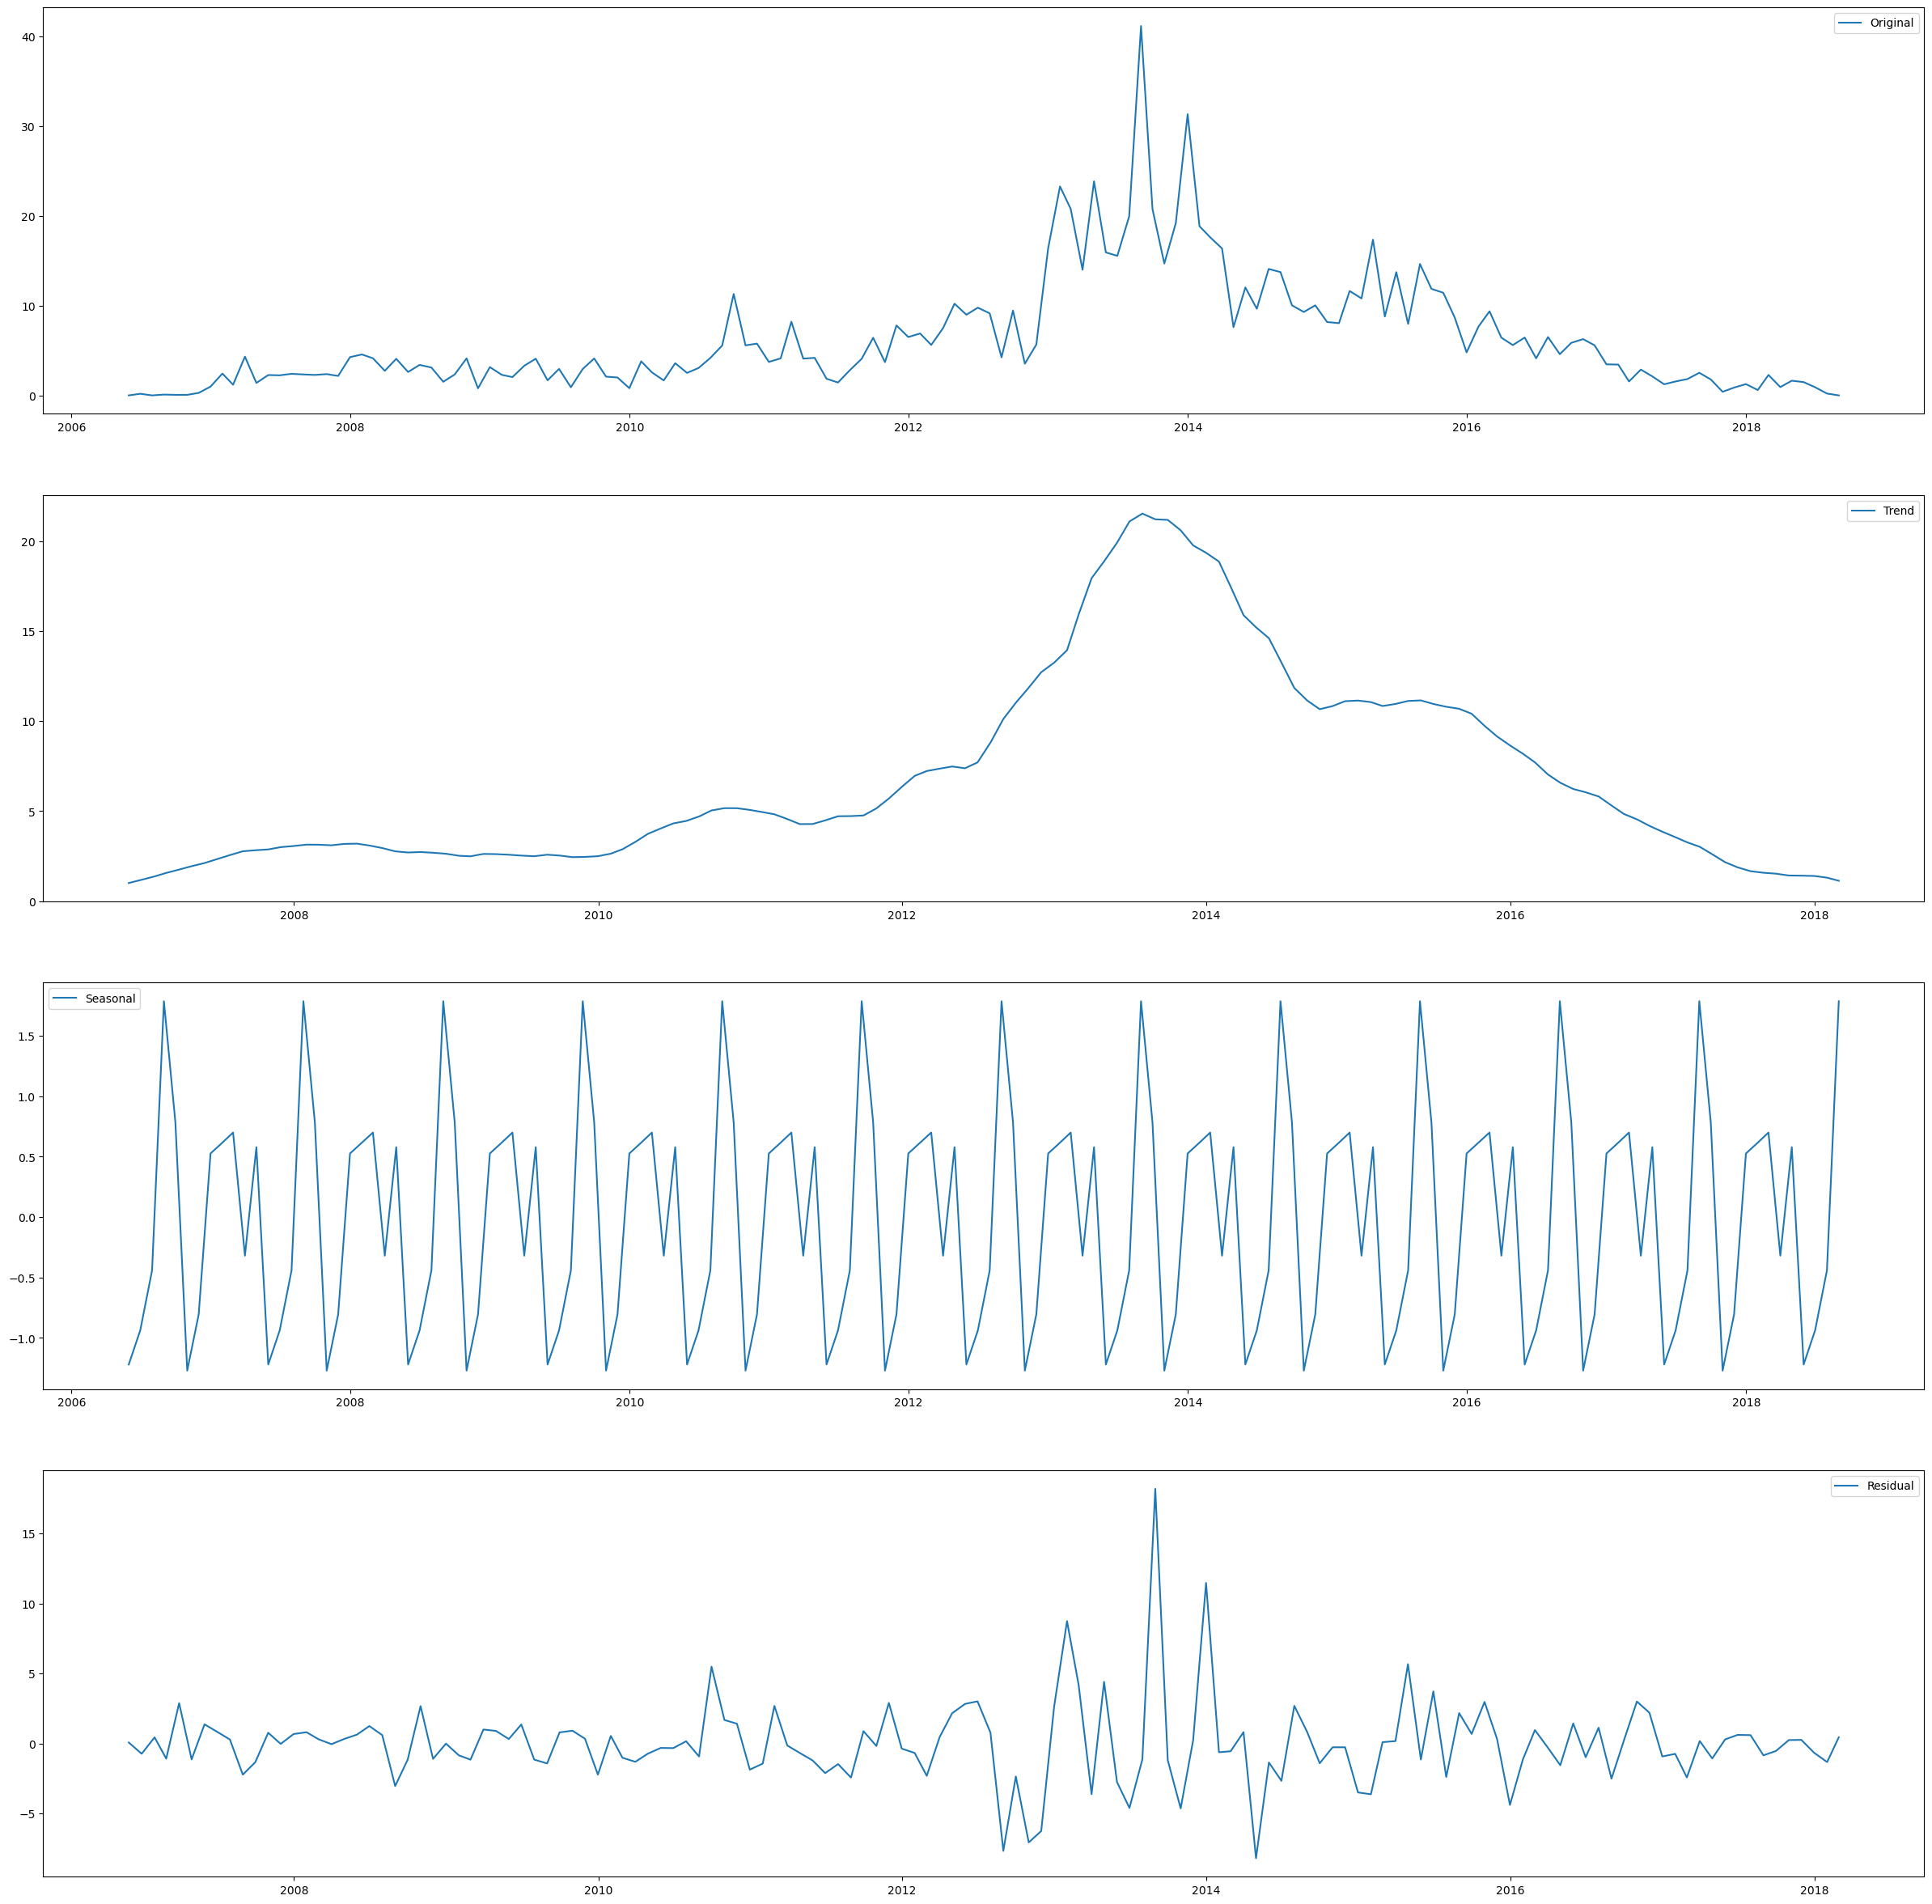

In [83]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Creating function to check stationarity

In [84]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [85]:
# Checking Stationarity of positive Sentiment Column
checkstationary(wa['pos'])

'Pvalue:0.16875252254804285.Data is not stationary, make data stationary'

In [86]:
# Checking Stationarity of Neutral Sentiment Column
checkstationary(wa['neu'])

'Pvalue:0.5365297731412361.Data is not stationary, make data stationary'

In [87]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(wa['neg'])

'Pvalue:0.3562412383881267.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [88]:
rolling_mean = wa['pos'].rolling(window=3).mean()
df_trend = wa['pos'] - rolling_mean
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = wa['pos'] - df_trend
df_seasonal.dropna(inplace=True)

# First order differencing
df_diff = df_seasonal.diff().dropna()

In [89]:
rolling_mean1 = wa['neu'].rolling(window=3).mean()
df_trend1 = wa['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = wa['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [90]:
rolling_mean2 = wa['neg'].rolling(window=3).mean()
df_trend2 = wa['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = wa['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [91]:
checkstationary(df_diff)

'Pvalue:0.016833712199354037. Data is stationary, Proceed to model building'

### check stationarity for neutral column

In [92]:
checkstationary(df_diff1)

'Pvalue:0.02299214838911195. Data is stationary, Proceed to model building'

### check stationarity for negative column

In [93]:
checkstationary(df_diff2)

'Pvalue:0.0026539274454173397. Data is stationary, Proceed to model building'

In [94]:
df_time_wa = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu', 'neg'])
df_time_wa.head()

pos       neu       neg
reviewTime                              
2006-08-31  0.514333  0.122000  0.030333
2006-09-30 -0.220000 -0.406667 -0.039667
2006-10-31  0.569333  0.410333  0.020333
2006-11-30  0.745000  2.526667  0.062000
2006-12-31  2.146667  1.545667  0.307000

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

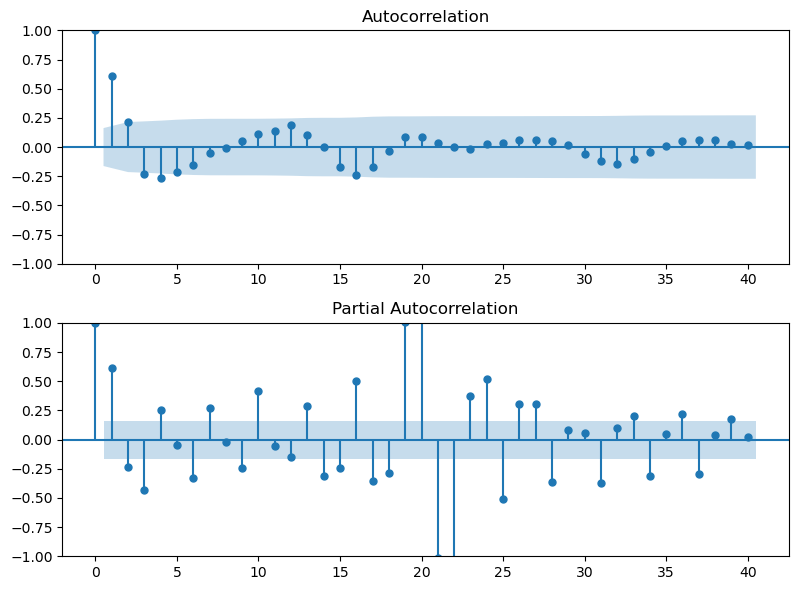

In [95]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

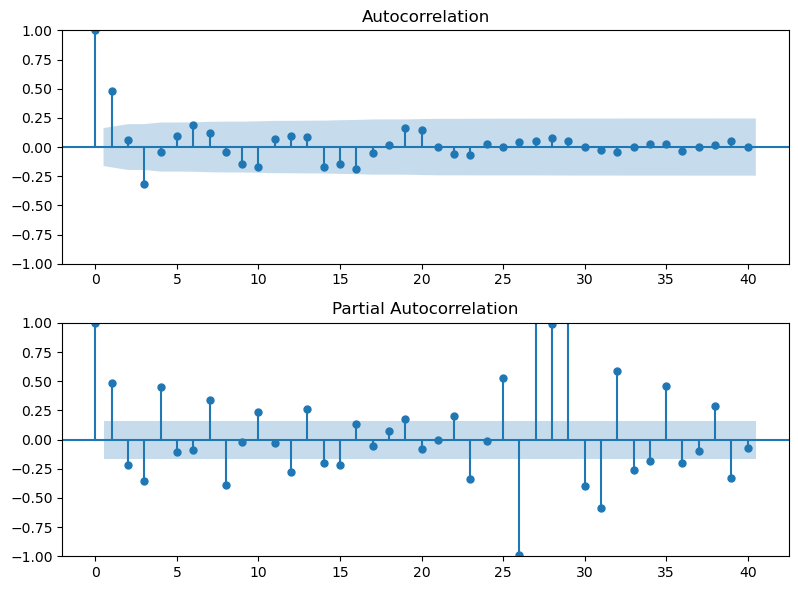

In [96]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

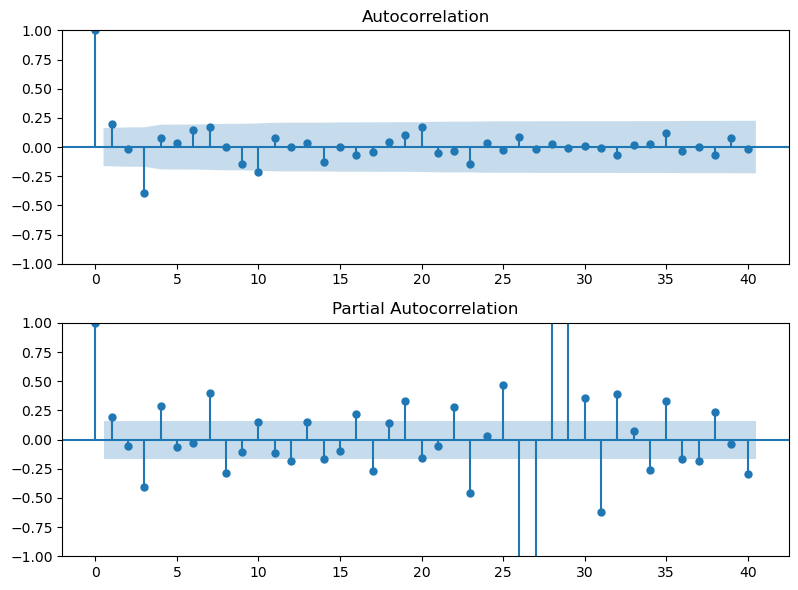

In [97]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['neg'], lags=40, ax=ax2)

plt.tight_layout()

In [98]:
#!pip install pmdarima

### Creating function to get optimum p and q value

### For positive column

In [99]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_wa['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1004.728, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1069.866, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1005.966, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1023.059, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=991.787, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=999.907, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=971.148, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=974.811, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=970.186, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=968.281, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=969.938, Time=0.21 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=969.264, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=970.281, Time=0.18 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 2.137 seconds
                               

### For neutral column

In [100]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_wa['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1076.602, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1112.232, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1077.028, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1082.856, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1070.500, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1072.447, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1042.298, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1056.282, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1030.028, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1028.795, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1029.572, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1031.423, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1030.795, Time=0.24 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 1.776 seconds
                      

### For negative column

In [101]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_wa['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=550.519, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=552.169, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=548.613, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=548.984, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=550.127, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=548.534, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=521.809, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=528.006, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=520.195, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=518.495, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=520.030, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=522.023, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=520.495, Time=0.22 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 1.434 seconds
                               SARI

### Splitting the data

In [102]:
split = int(0.95 * len(df_time_wa))
train = df_time_wa.iloc[:split]
test = df_time_wa.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 137, Test = 8


## Model building

### Creating function for sarima model for positive sentiment

In [103]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(4, 0, 0),seasonal_order=(4,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for neutral sentiment

In [104]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(4, 0, 0),seasonal_order=(4,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [105]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(0, 0, 1),seasonal_order=(0,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [106]:
train1 = SARMA1(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [107]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [108]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

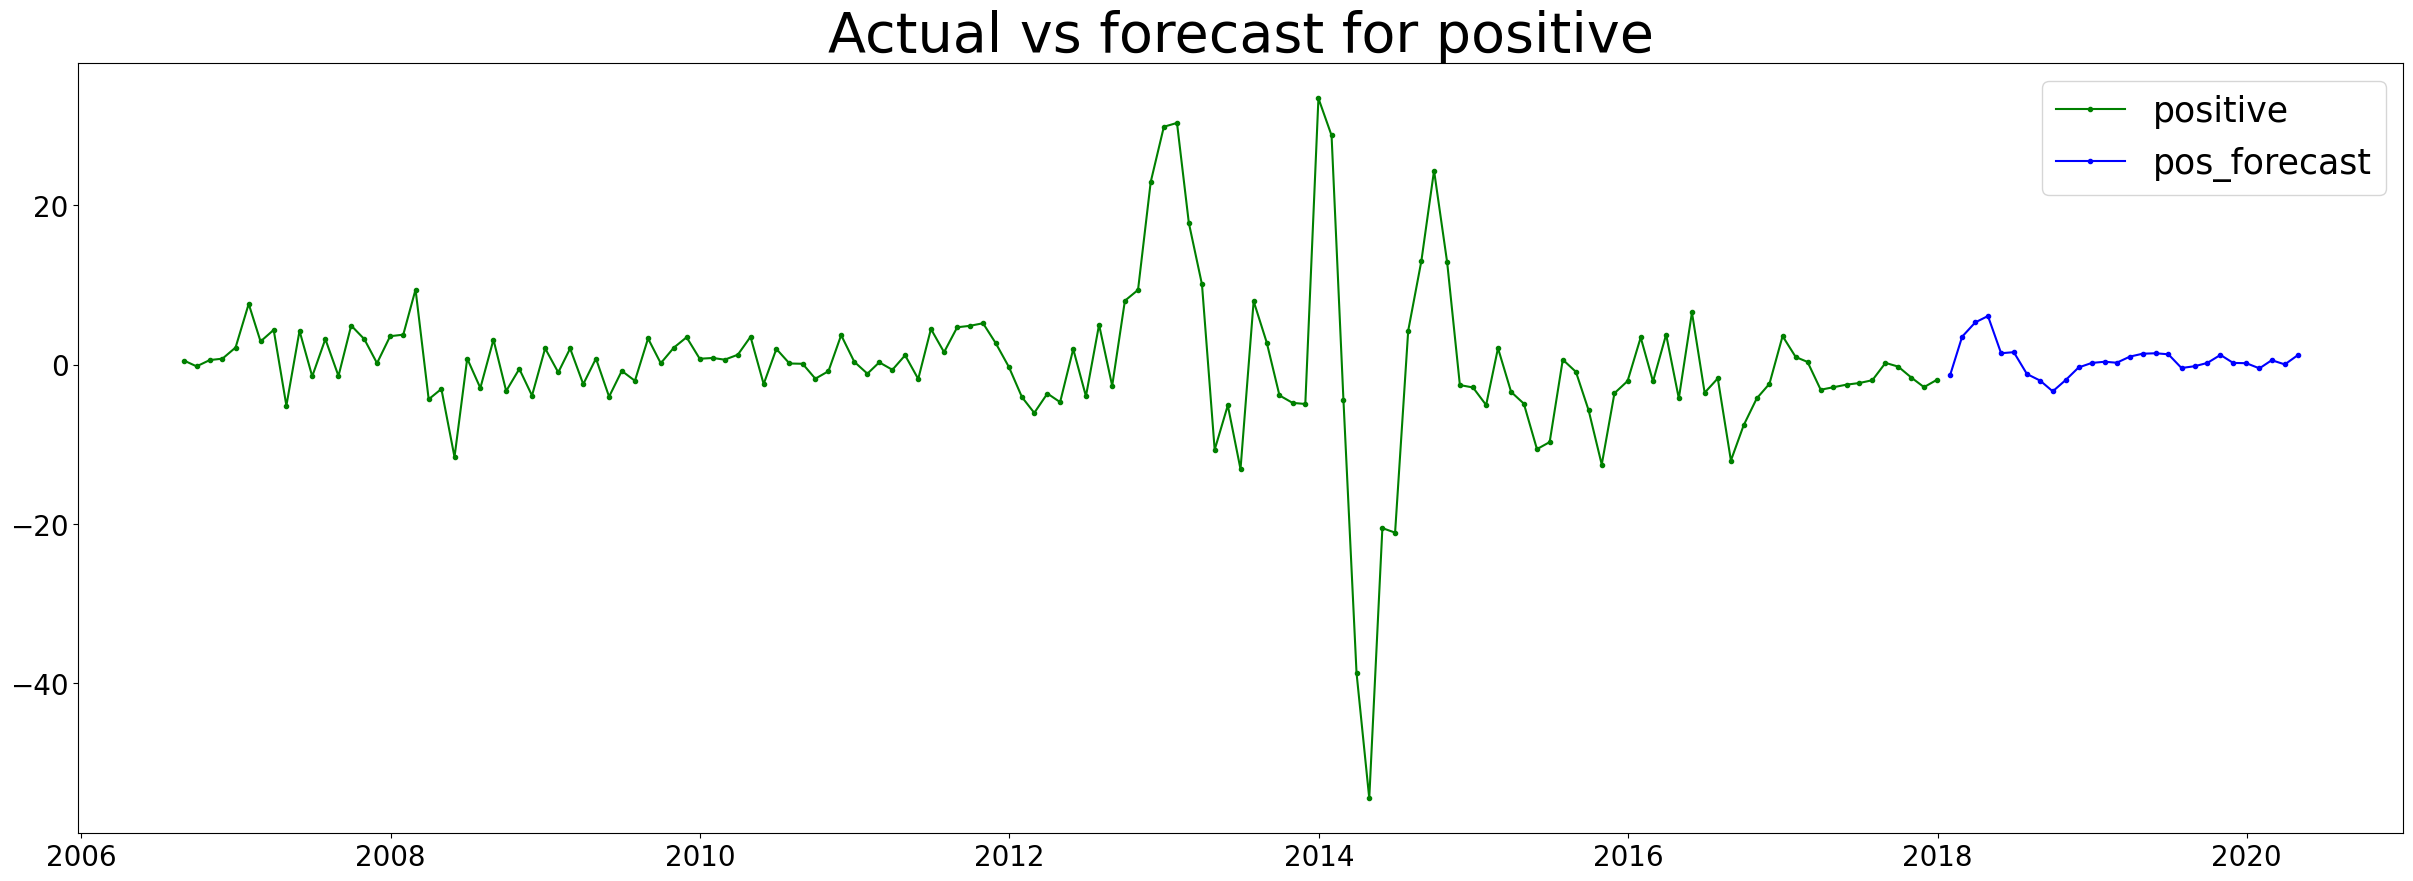

In [109]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

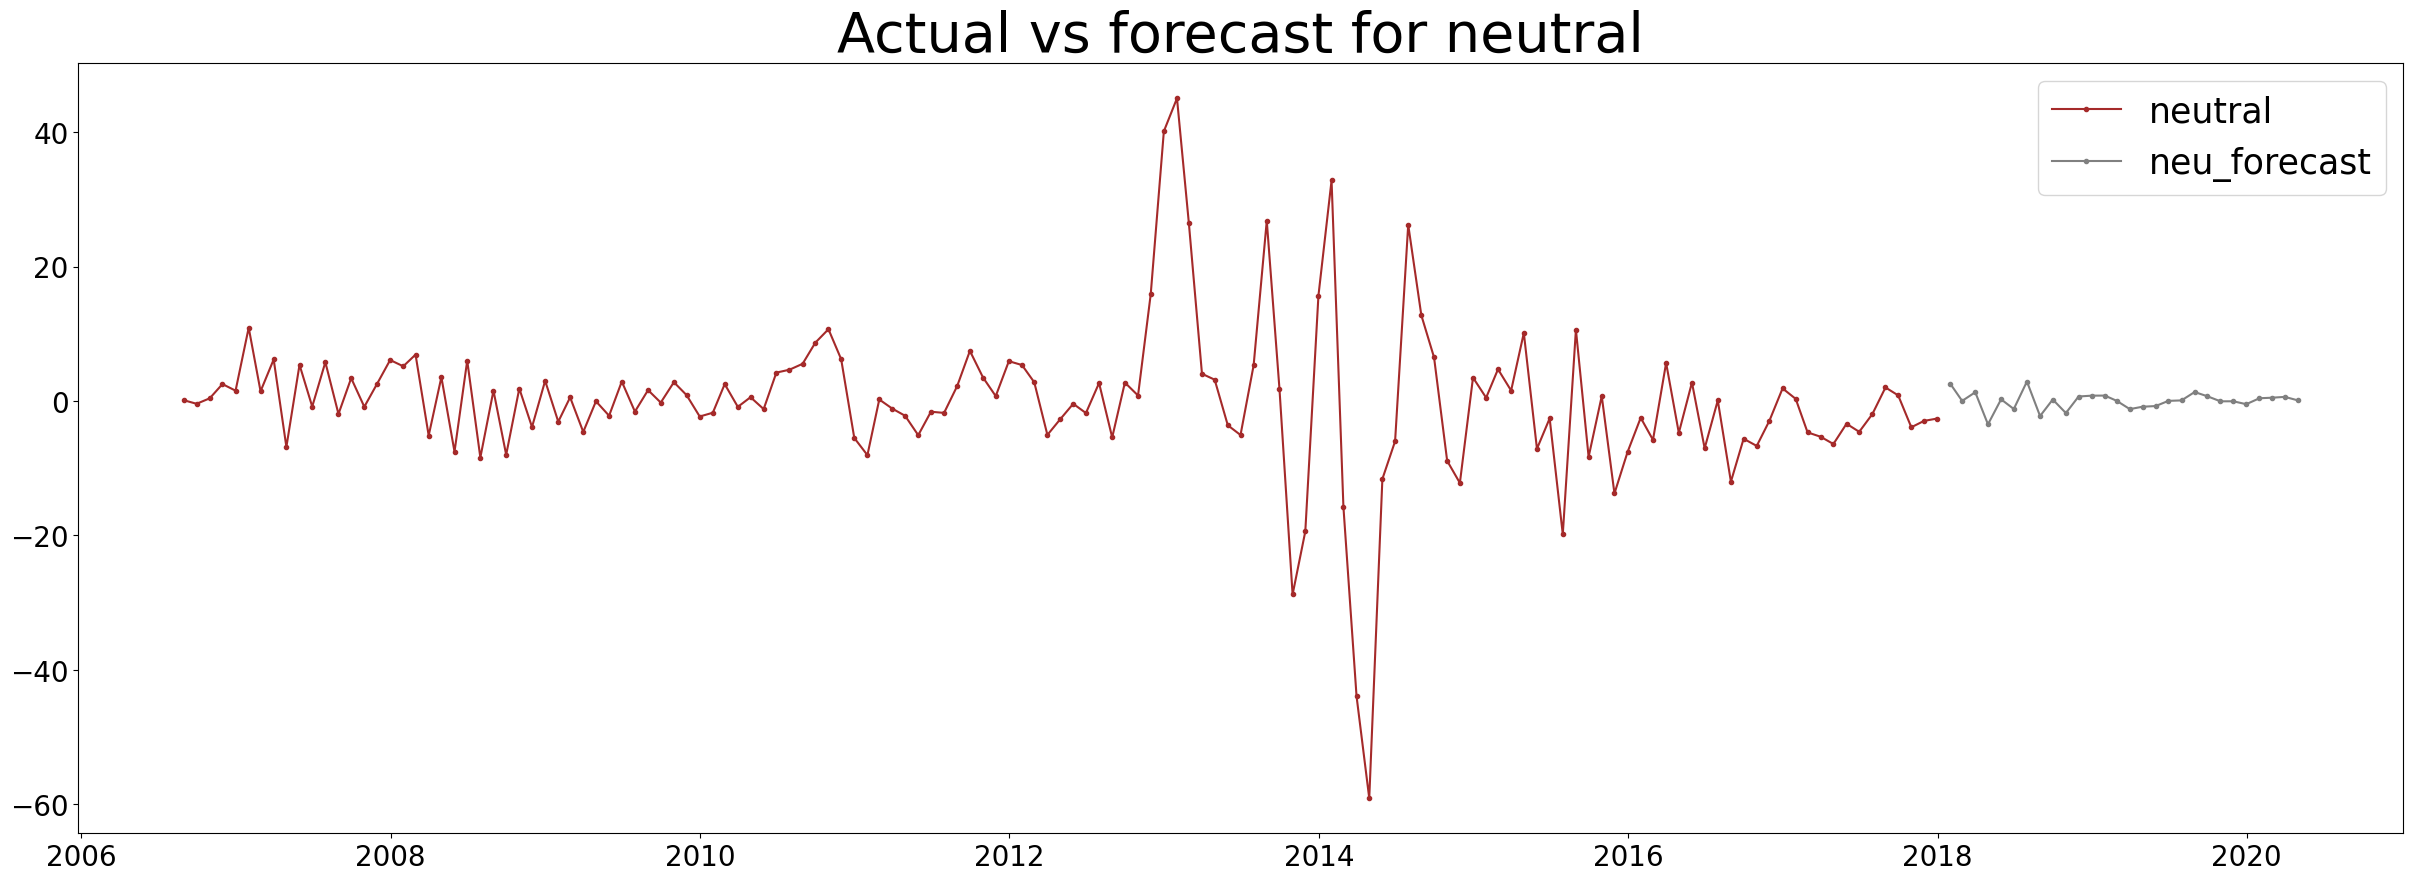

In [110]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'brown')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'grey')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

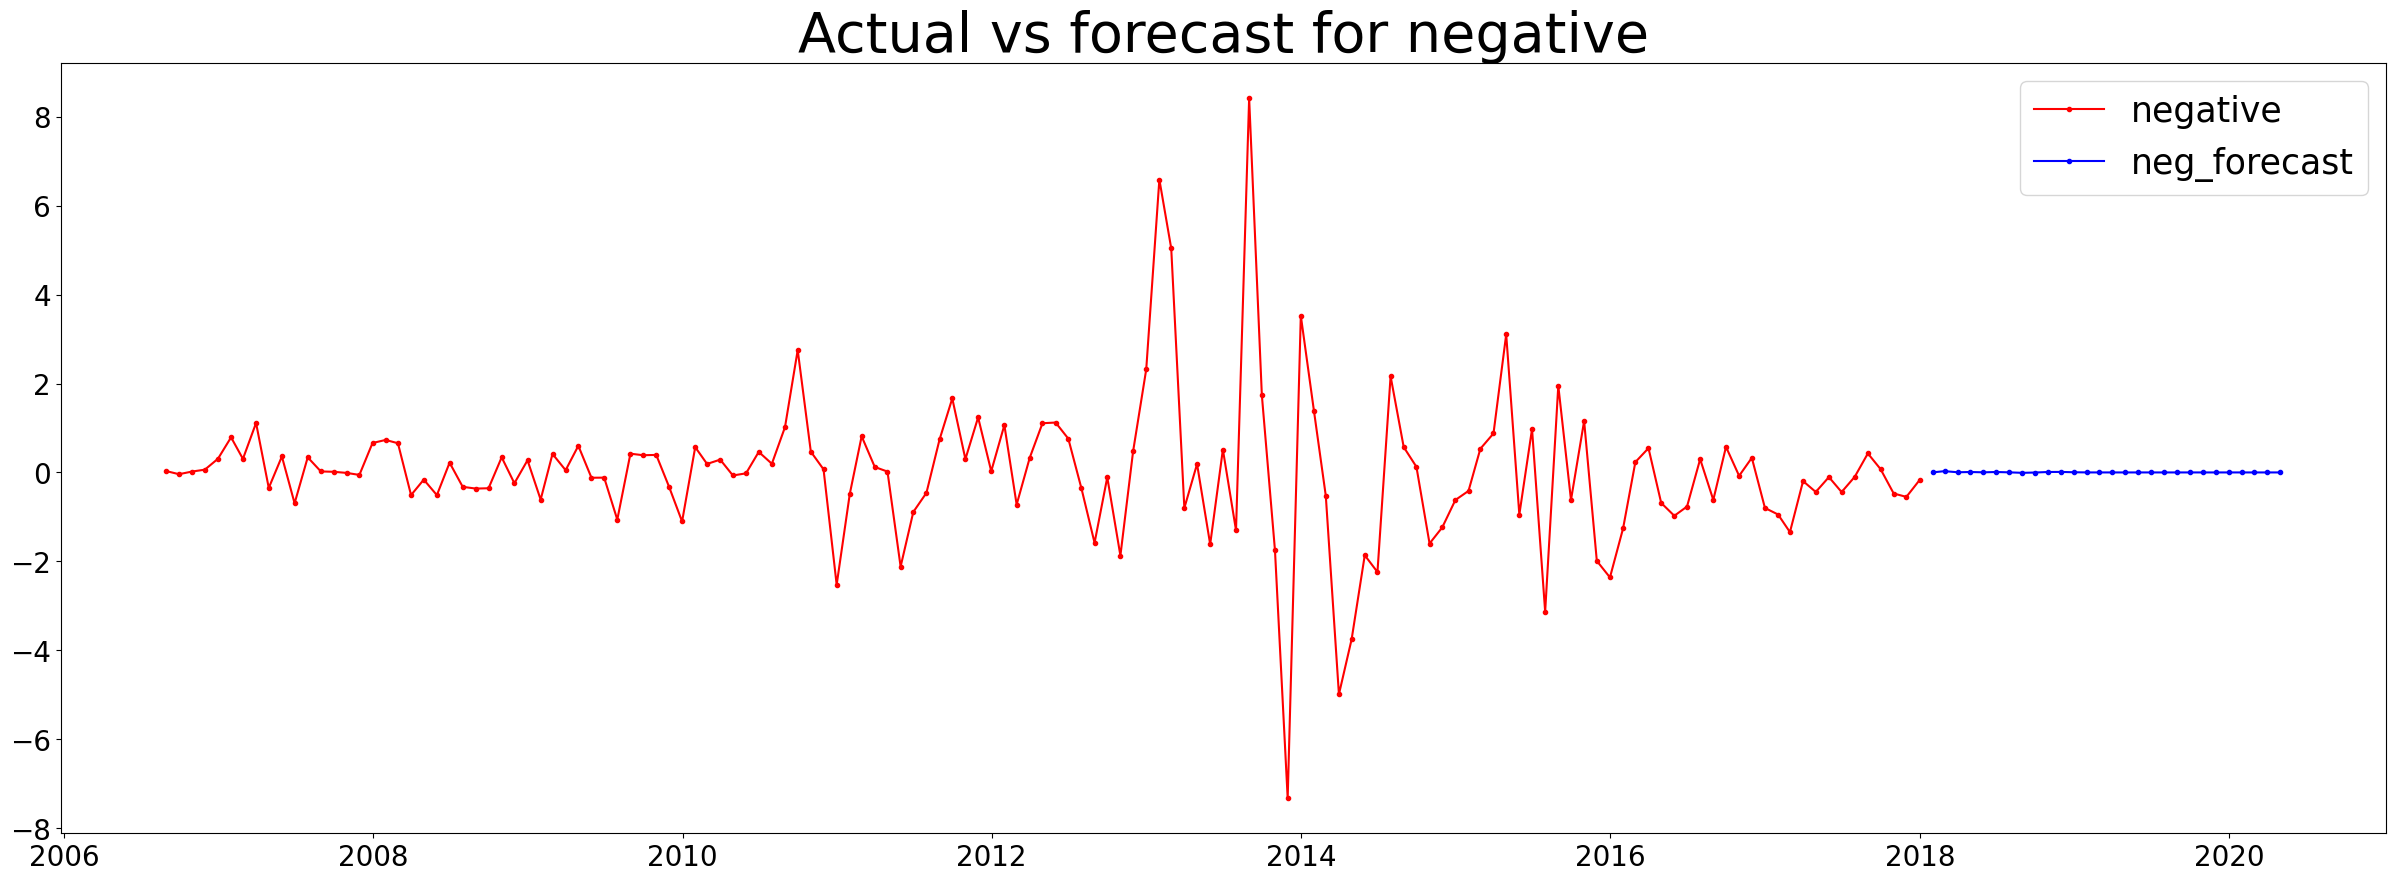

In [111]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

### Delivery words on text

In [113]:
def is_delivery_related(review):
    keywords = ['delivery', 'shipping', 'shipment', 'courier', 'logistics', 'dispatch', 'transport', 'package', 'tracking', 'eta']
    for keyword in keywords:
        if keyword in review.lower():
            return 1
    return 0

In [114]:
df['delivery_related'] = df['reviewText'].apply(is_delivery_related)

In [115]:
df.delivery_related.value_counts()

0    314555
1     16067
Name: delivery_related, dtype: int64

In [116]:
new = df[df['delivery_related'] == 1][['reviewText','brand']]
new

reviewText              brand
11      delivery took long time started use work based...  Pirmal Healthcare
14                       great product fast shipment love  Pirmal Healthcare
16      read mary kay satin hands lotion online someon...           Mary Kay
42      package complete satisfaction wife smell great...      Jenna Jameson
51      first smells fruity complexity patchouli fan p...      Jenna Jameson
...                                                   ...                ...
330895  excellant model excellant quality detail one y...            unknown
330909  really people sorry used reviews making decisi...            unknown
330926                      luv fast shipping thanks much            unknown
330933     stuff perfect package good shipping fast thank        Unique Edge
330945  hair quality expect price shiny doll-like hair...               COCO

[16067 rows x 2 columns]

## For brand : Philips Norelco

### Seasonal Decompose  For Philips Norelco on Positive Reviews

In [117]:
decomposition=seasonal_decompose(ph['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

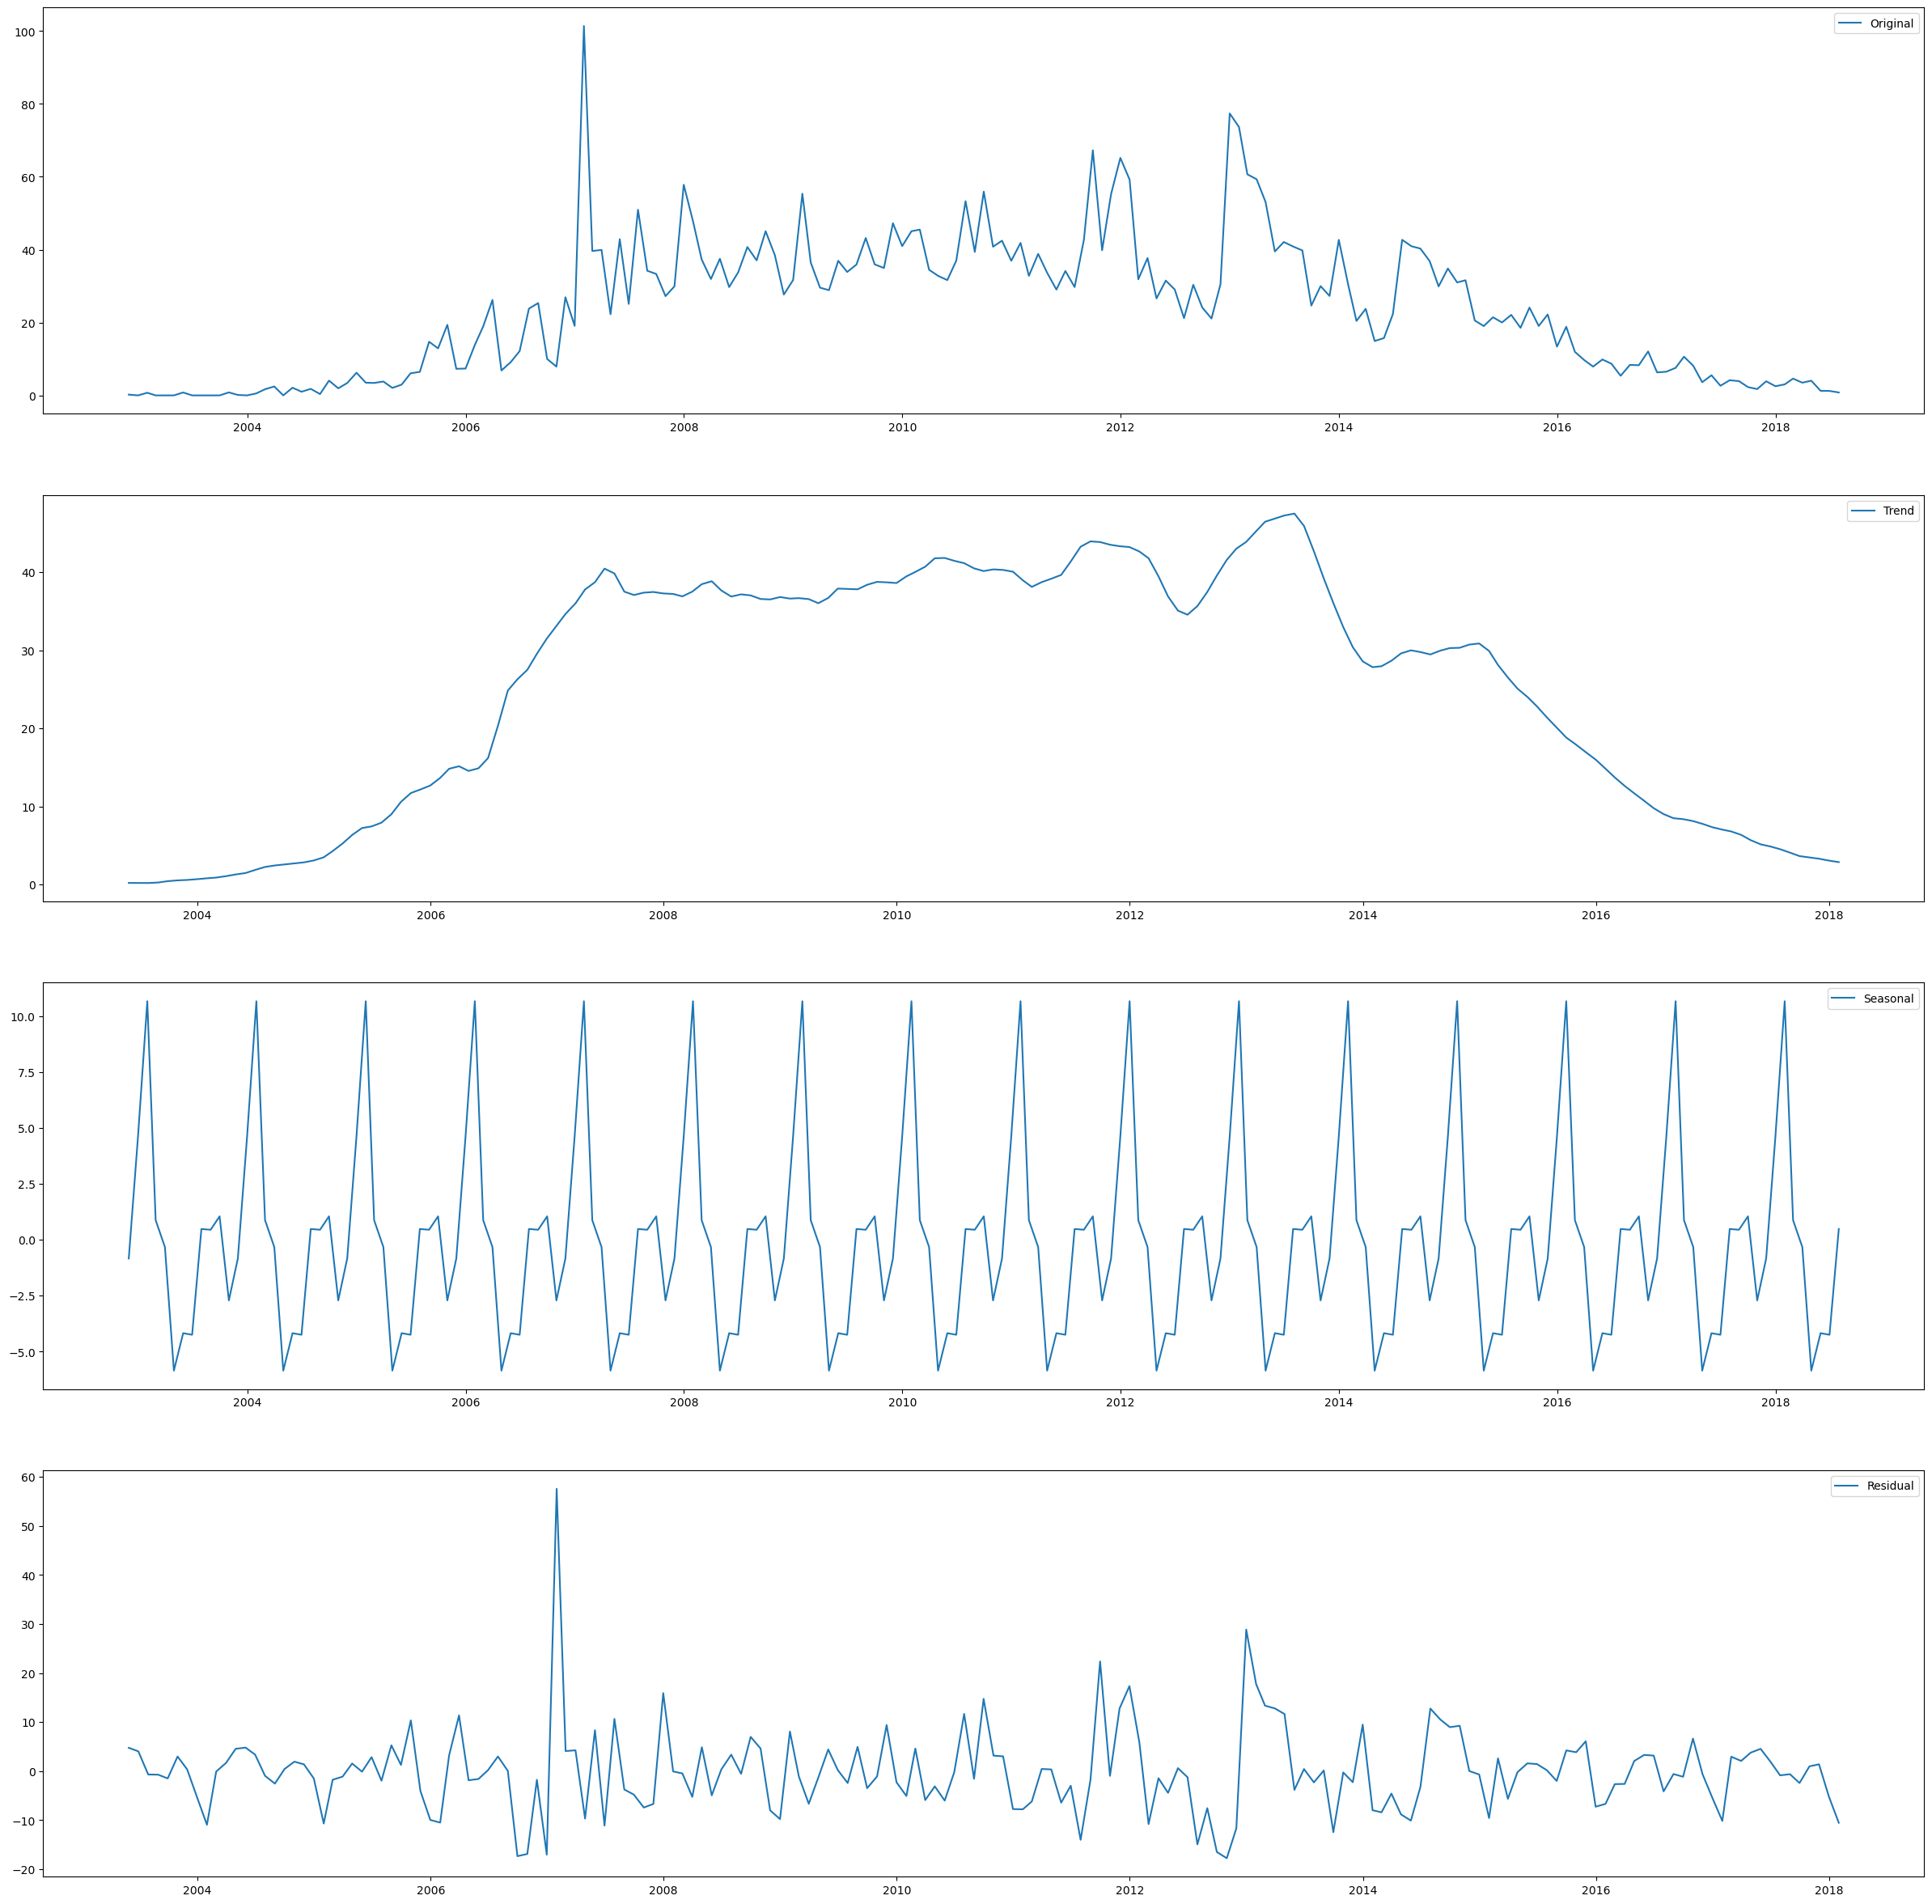

In [118]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Philips Norelco on Neutral Reviews

In [119]:
decomposition=seasonal_decompose(ph['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

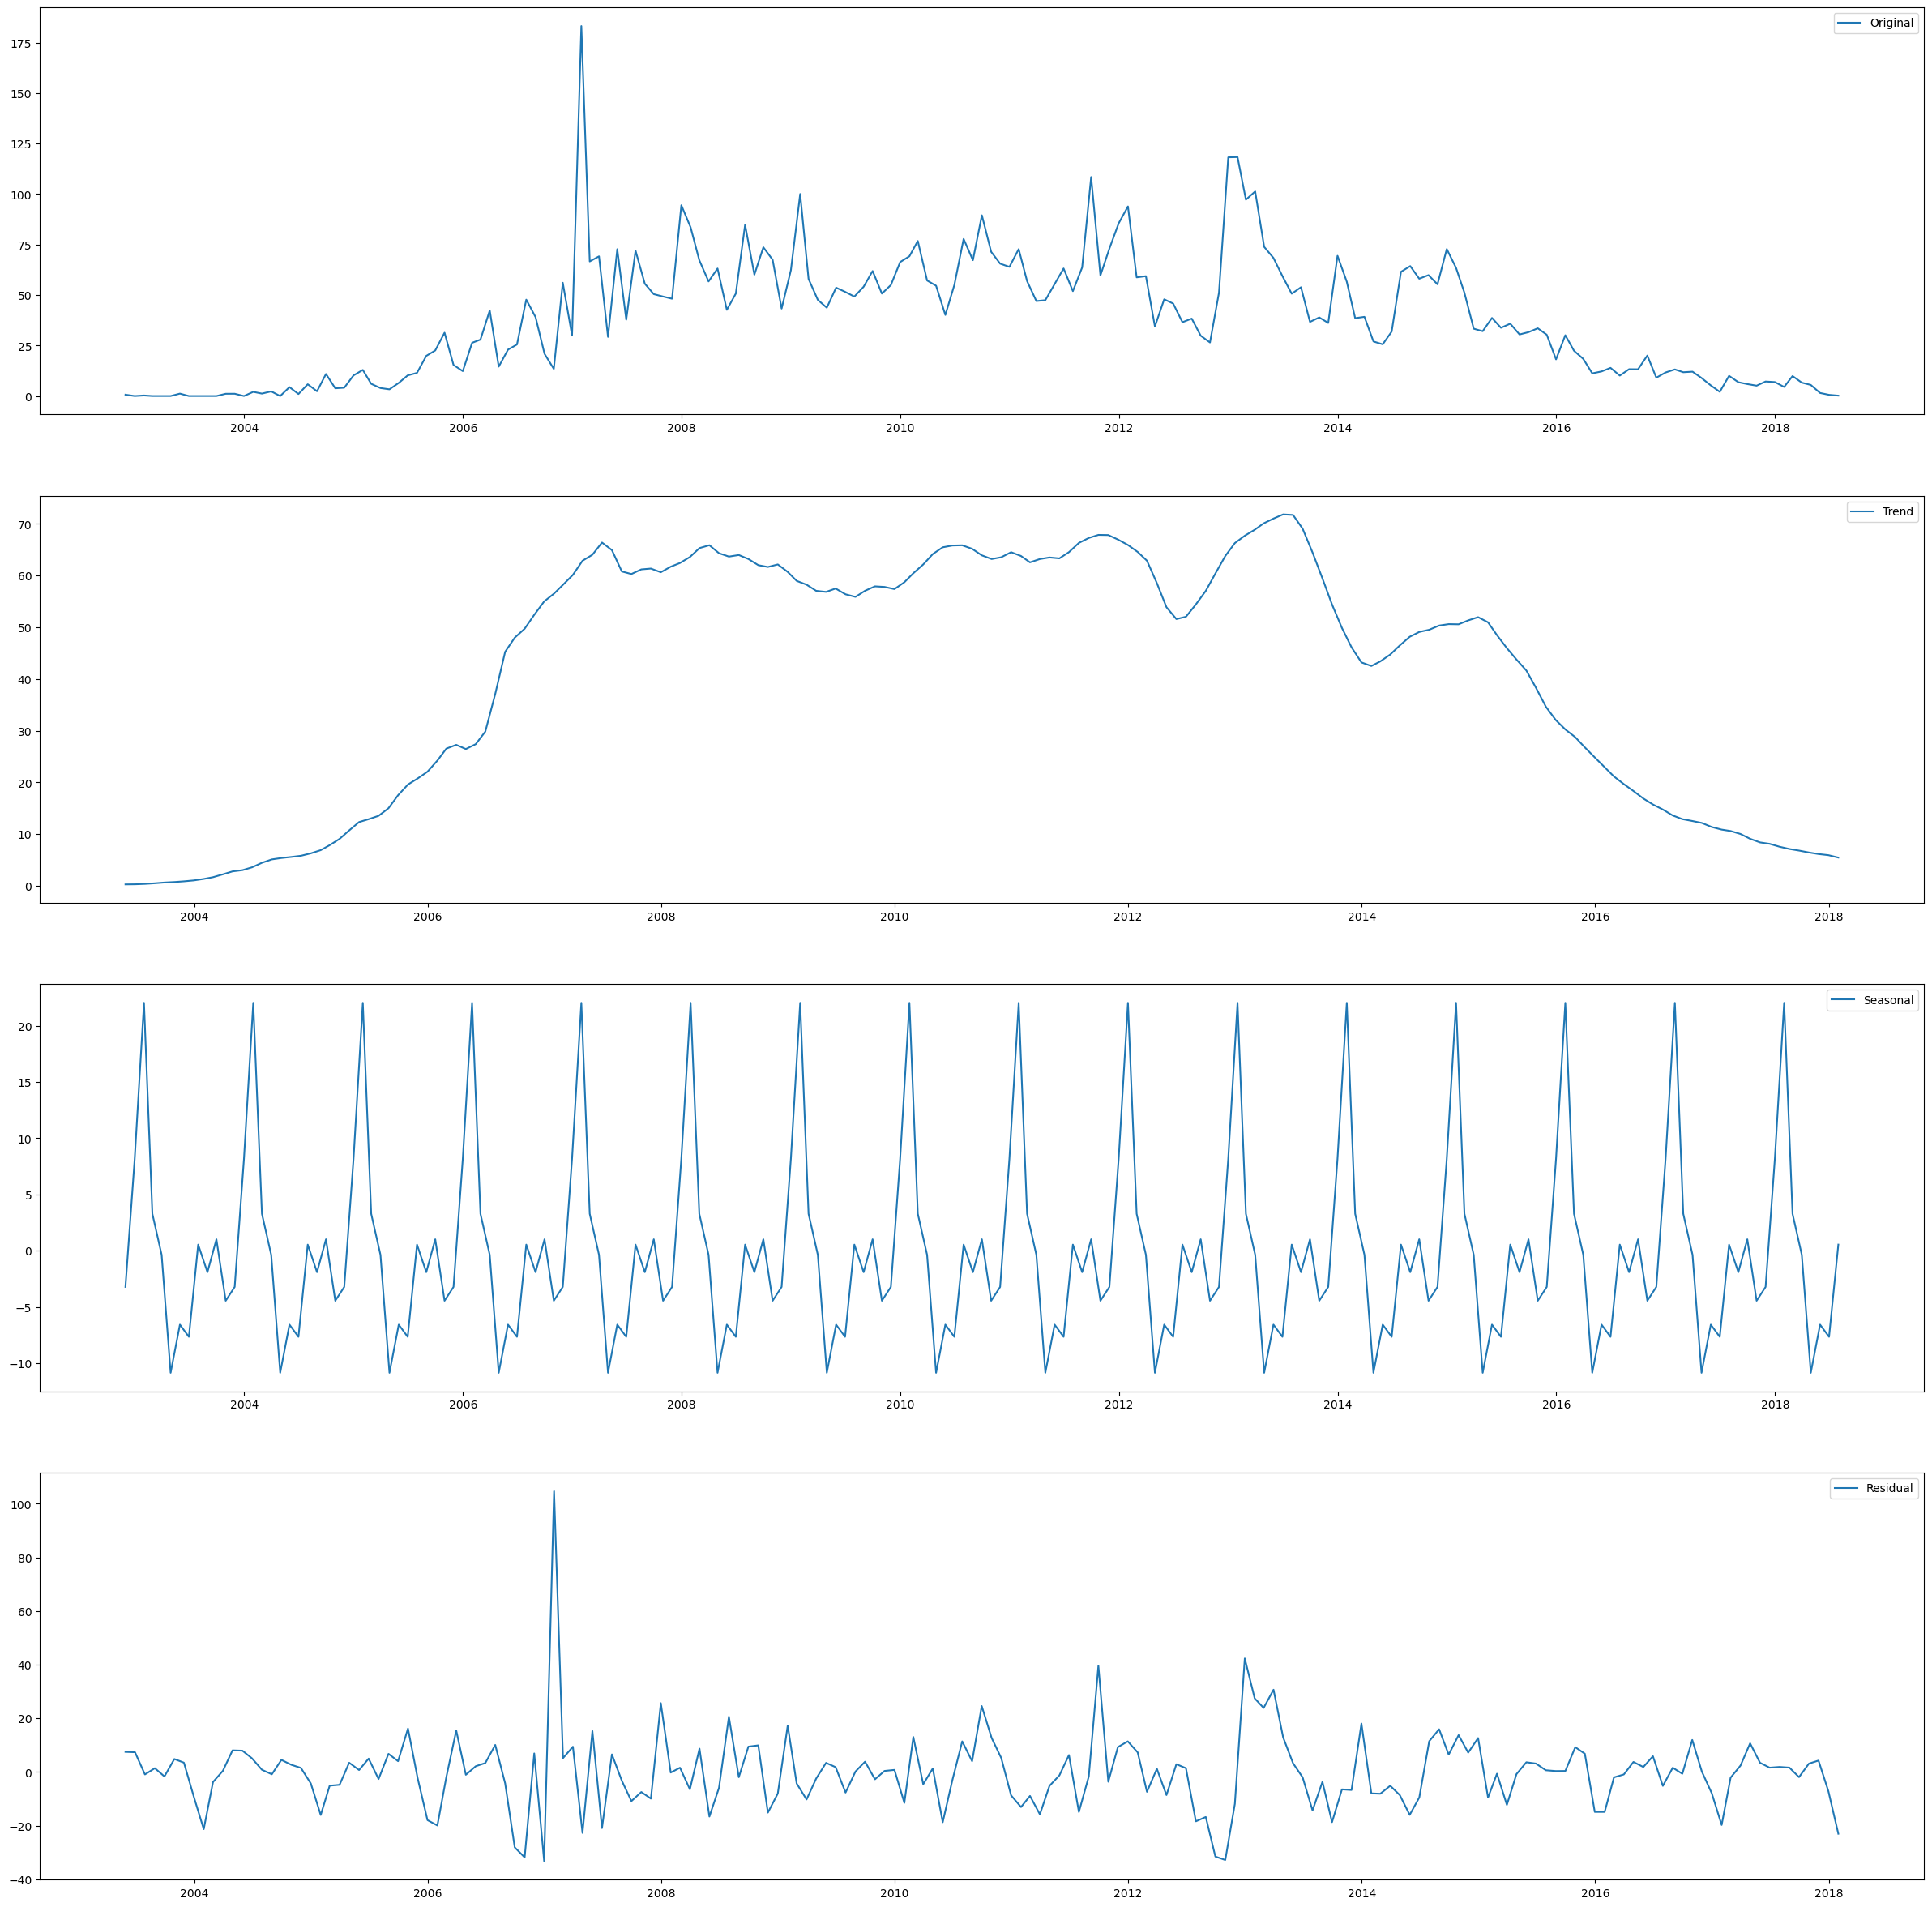

In [120]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Philips Norelco on Negative Reviews

In [121]:
decomposition=seasonal_decompose(ph['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

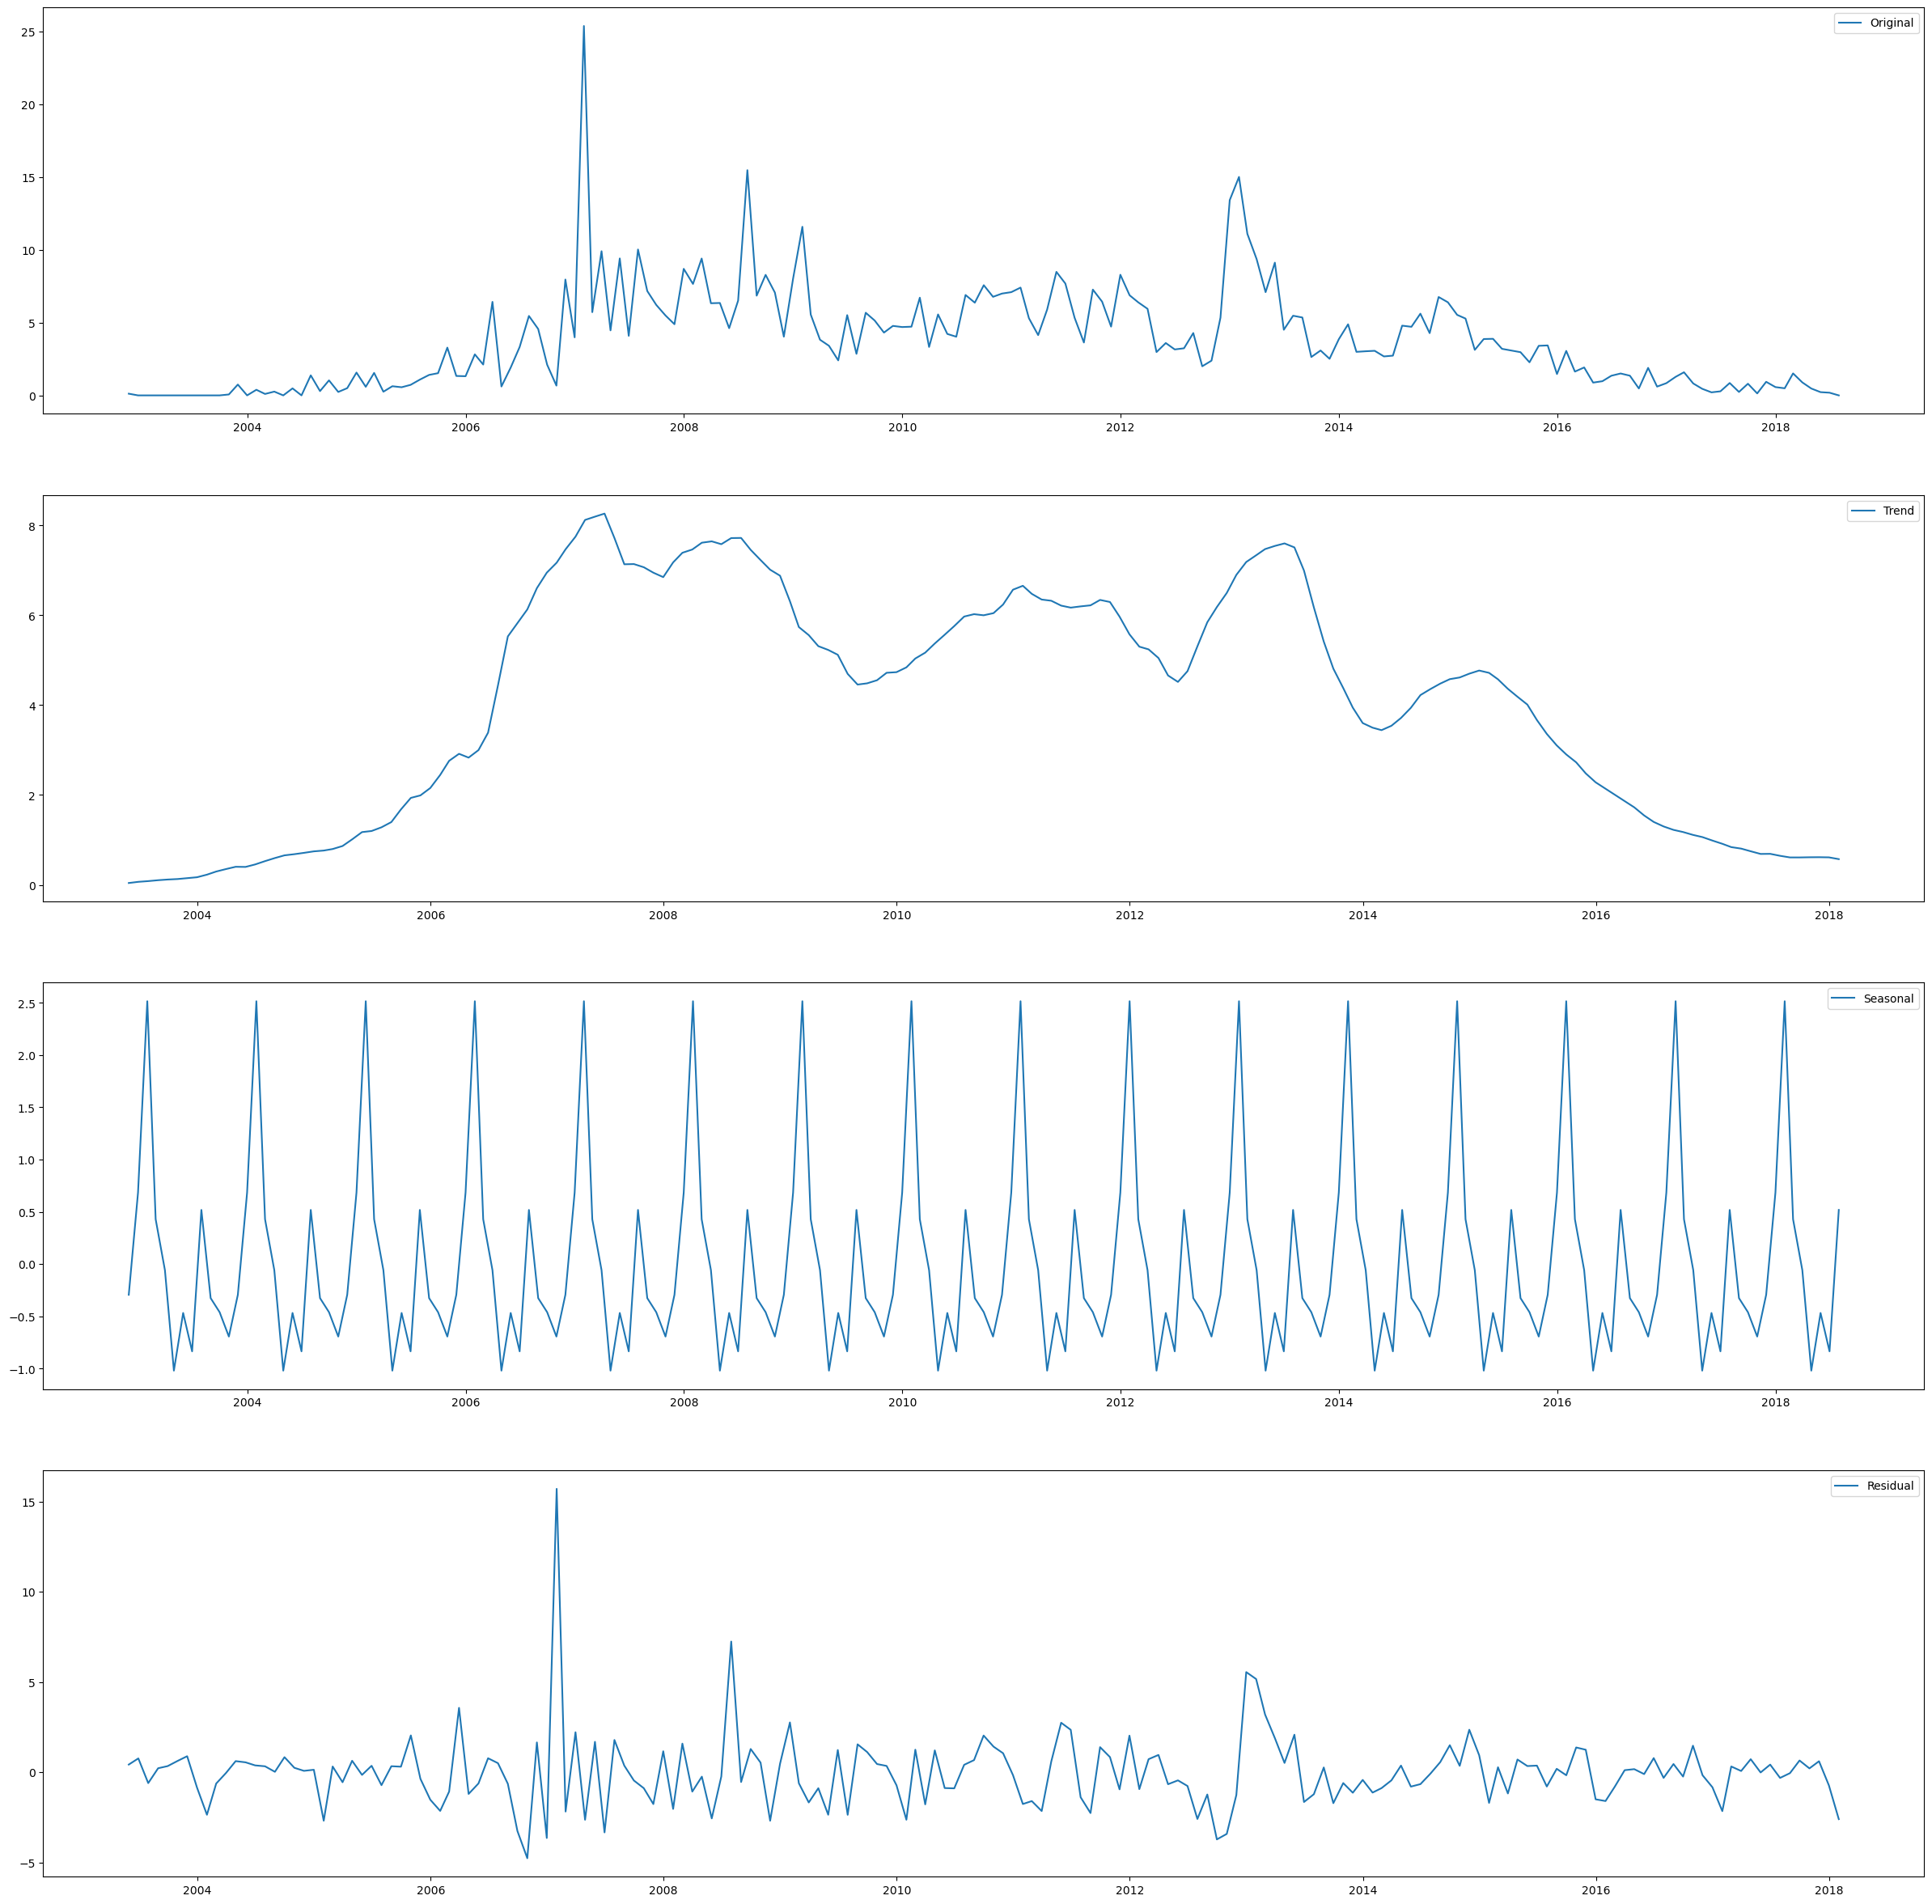

In [122]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

In [123]:
# Checking Stationarity of positive Sentiment Column
checkstationary(ph['pos'])

'Pvalue:0.657388240312729.Data is not stationary, make data stationary'

In [124]:
# Checking Stationarity of neutral Sentiment Column
checkstationary(ph['neu'])

'Pvalue:0.6319158050268741.Data is not stationary, make data stationary'

In [125]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(ph['neg'])

'Pvalue:0.21863127251572634.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [126]:
rolling_mean = ph['pos'].rolling(window=3).mean()
df_trend = ph['pos'] - rolling_mean
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = ph['pos'] - df_trend
df_seasonal.dropna(inplace=True)
# First order differencing
df_diff = df_seasonal.diff().dropna()

In [127]:
rolling_mean1 = ph['neu'].rolling(window=3).mean()
df_trend1 = ph['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = ph['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [128]:
rolling_mean2 = ph['neg'].rolling(window=3).mean()
df_trend2 = ph['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = ph['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [129]:
checkstationary(df_diff)

'Pvalue:2.456784665563307e-06. Data is stationary, Proceed to model building'

### check stationarity for neutral column

In [130]:
checkstationary(df_diff1)

'Pvalue:1.1649450283128314e-06. Data is stationary, Proceed to model building'

### check stationarity for negative column

In [131]:
checkstationary(df_diff2)

'Pvalue:1.636234870149966e-05. Data is stationary, Proceed to model building'

In [132]:
df_time_ph = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu','neg'])
df_time_ph.head()

pos           neu    neg
reviewTime                               
2003-02-28 -0.071333 -2.230000e-01 -0.039
2003-03-31  0.000000  0.000000e+00  0.000
2003-04-30 -0.240667 -9.266667e-02  0.000
2003-05-31  0.266333  4.003333e-01  0.000
2003-06-30  0.000000 -5.551115e-17  0.000

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

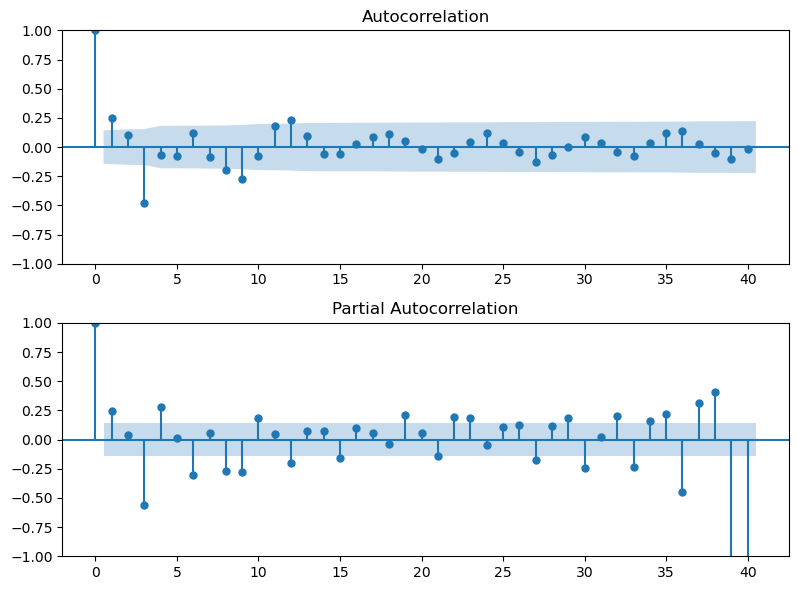

In [133]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

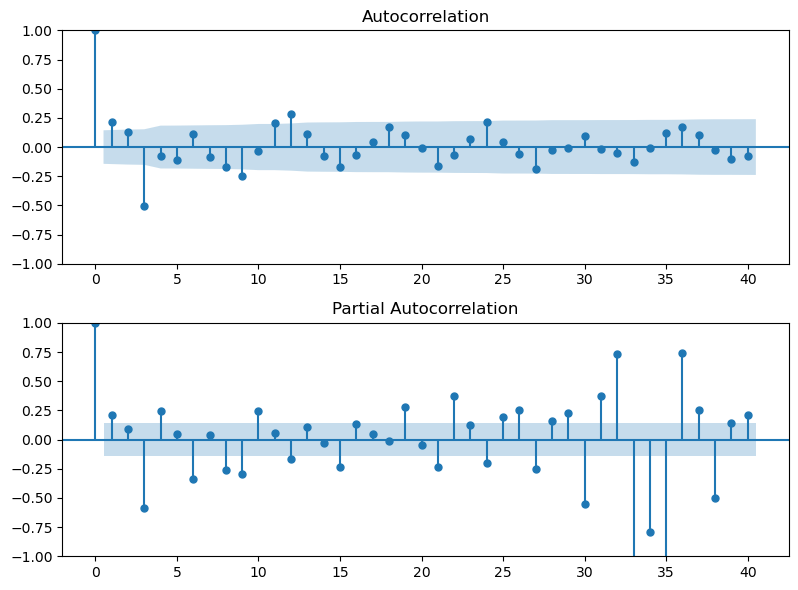

In [134]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

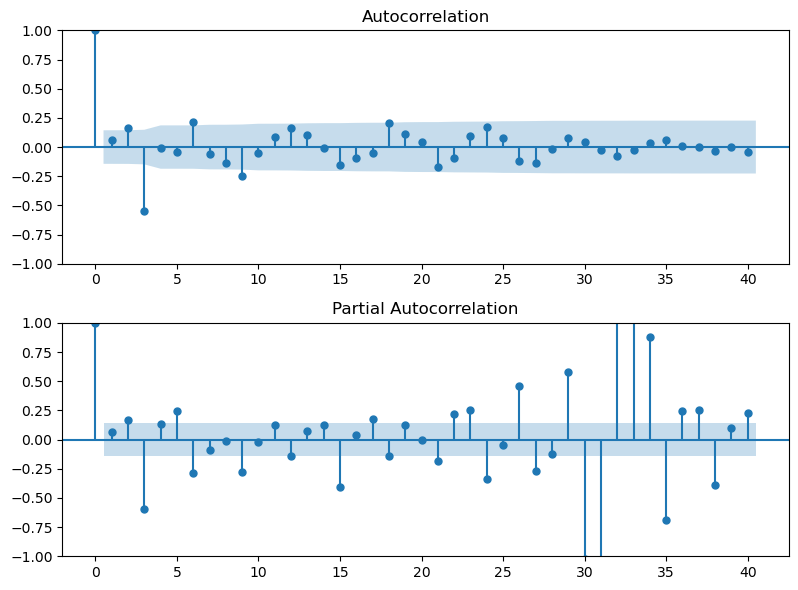

In [135]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['neg'], lags=40, ax=ax2)

plt.tight_layout()

### Creating function to get optimum p and q value

### For positive column

In [136]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_ph['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1123.690, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1131.437, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1121.746, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1124.656, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1123.445, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1103.570, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1052.875, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1059.818, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1050.293, Time=0.31 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1048.310, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1050.258, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1046.202, Time=0.42 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1038.191, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1014.416, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0]          

### For neutral column

In [137]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ph['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1333.097, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1337.920, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1331.332, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1333.714, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1331.857, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1308.093, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1254.835, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1259.453, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1253.350, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1251.444, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1253.094, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1247.684, Time=0.27 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1

### For negative column

In [138]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ph['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=597.856, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=594.830, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=596.130, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=596.322, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=596.830, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:                        SARIMAX   Log Likelihood                -296.415
Date:                Thu, 13 Apr 2023   AIC                            594.830
Time:                        13:09:10   BIC                            598.055
Sample:                    02-28-2003   HQIC                           596.137
                         - 07-31-2018                                         
Co

### Splitting the data

In [139]:
split = int(0.95 * len(df_time_ph))
train = df_time_ph.iloc[:split]
test = df_time_ph.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 176, Test = 10


### Model building

### Creating function for sarima model for positive sentiment

In [140]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(3, 0, 2),seasonal_order=(3,0,2,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for neutral sentiment

In [141]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(5, 0, 1),seasonal_order=(5,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [142]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(0, 0, 0),seasonal_order=(0,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [143]:
train1 = SARMA1(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [144]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [145]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

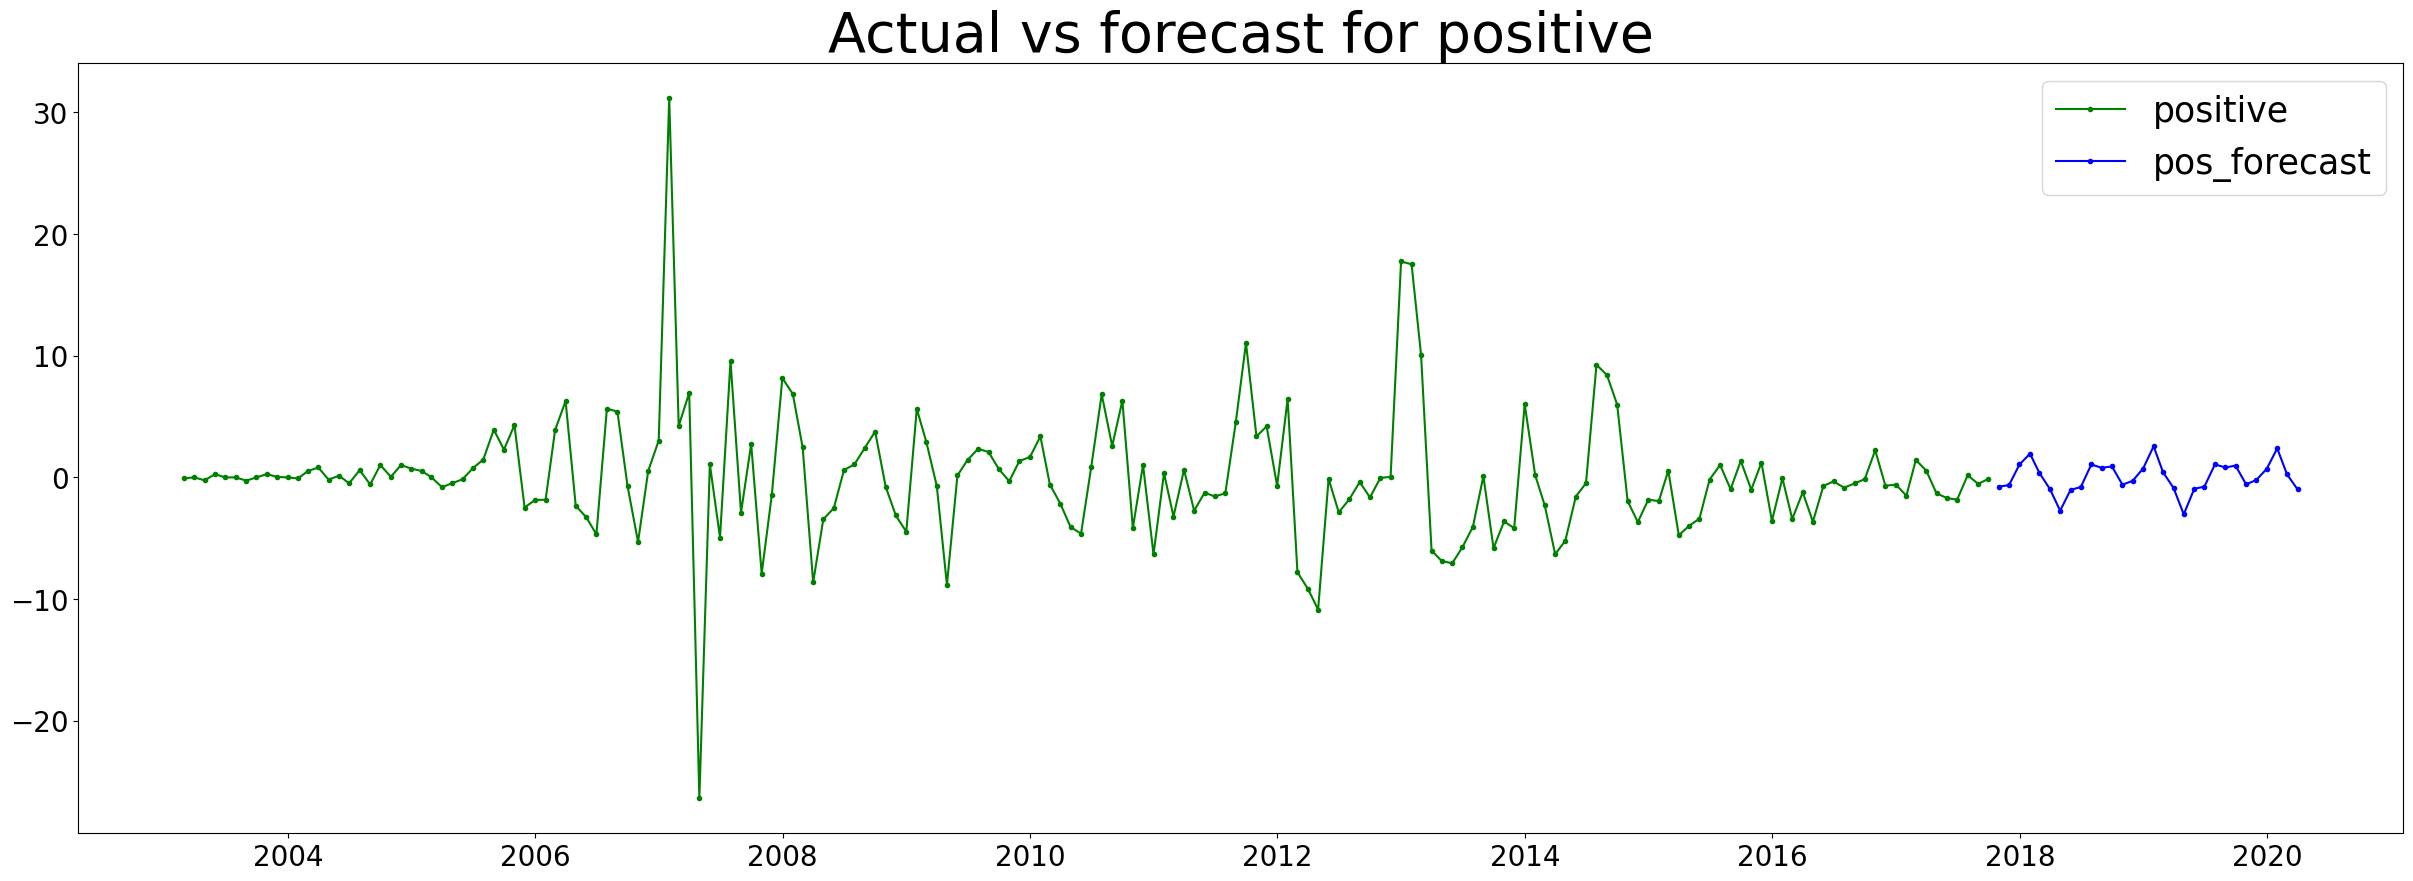

In [146]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

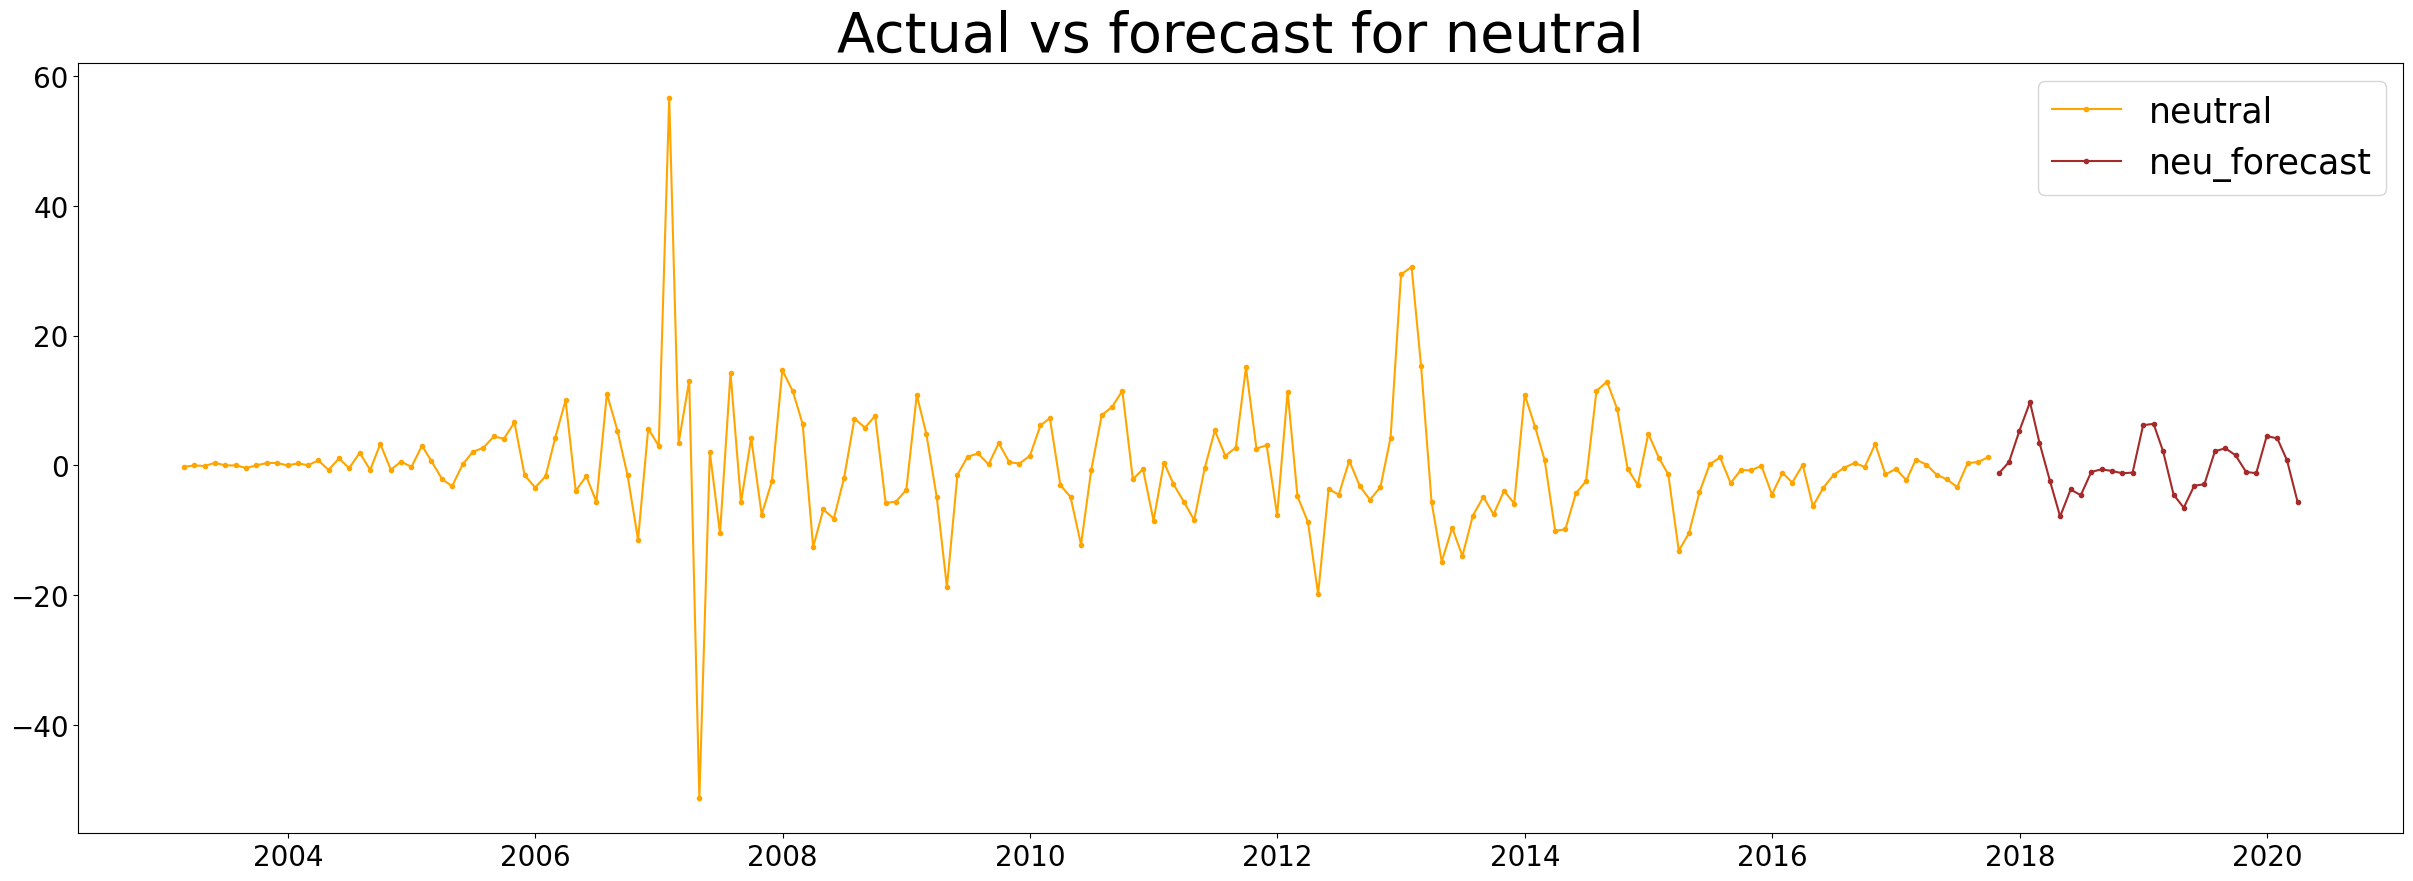

In [147]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'orange')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'brown')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

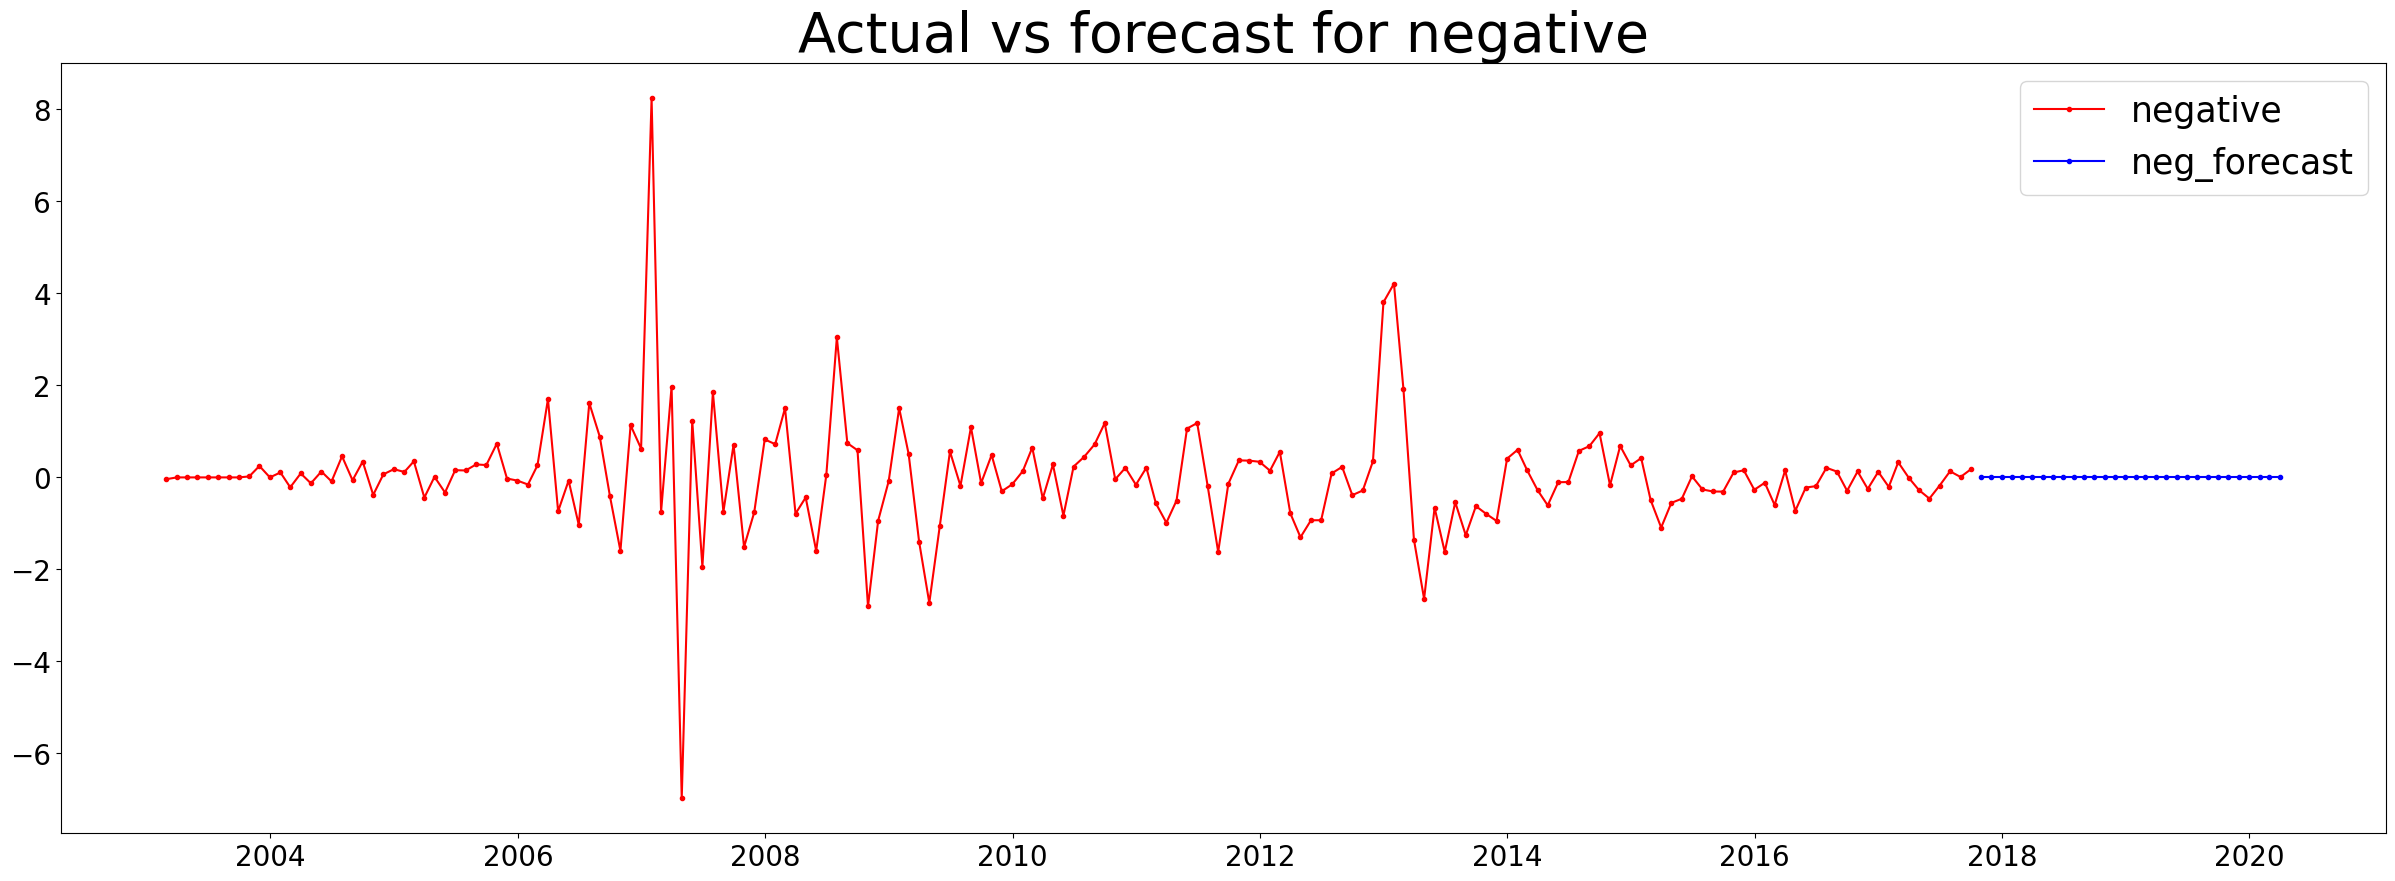

In [148]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);